In [1]:
# Standard libraries Imports
import json
# Third party Imports
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Local imports
from src.utils import count_plot_percentage
from src.utils import one_hot_encoding
from src.utils import get_kdist_plot, make_count_plot, make_3d_viz

In [2]:
data = pd.read_csv("data/Citywide_Mobility_Survey_-_Person_Survey_2019.csv")

In [3]:
data.head()

,hh_id,weight,cms_zone,survey_mode,person_id,person_num,is_participant,num_days,num_days_complete,num_trips,...,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,191546322,0.00000,Inner Brooklyn,1,19154632203,3,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
1,191546322,0.00000,Inner Brooklyn,1,19154632202,2,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
2,191546322,212.12729,Inner Brooklyn,1,19154632201,1,1,7.0,7.0,23.0,...,1,0,0,0,0,0,0,0,0,1
3,19241657,0.00000,Middle Queens,1,1924165703,3,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
4,19241657,0.00000,Middle Queens,1,1924165702,2,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995


* Observe having nominal data(categoricals represented by numbers). s.t. is_participant, race, and disability columns
* Observe having NULL values

In [4]:
data.describe()

,hh_id,weight,survey_mode,person_id,person_num,is_participant,num_days,num_days_complete,num_trips,num_walk_trips,...,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
count,8.286000e+03,8286.000000,8286.000000,8.286000e+03,8286.000000,8286.000000,3346.000000,3346.000000,3346.000000,3346.000000,...,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000
mean,2.468398e+07,804.993000,1.246681,2.468398e+09,2.146633,0.403814,5.475792,4.334130,25.540646,10.004782,...,638.420468,638.613444,638.453295,617.448467,617.443036,617.467053,617.445571,617.442674,617.449071,617.774922
std,2.974500e+07,4395.258128,0.496917,2.974500e+09,1.317302,0.490691,2.612294,2.524525,21.900434,12.091553,...,477.339270,477.081235,477.295392,482.943289,482.950227,482.919543,482.946990,482.950690,482.942518,482.525910
min,1.900024e+07,0.000000,1.000000,1.900024e+09,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.926343e+07,0.000000,1.000000,1.926343e+09,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.951784e+07,0.000000,1.000000,1.951784e+09,2.000000,0.000000,7.000000,5.000000,24.000000,5.000000,...,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
75%,1.979496e+07,199.885270,1.000000,1.979496e+09,3.000000,1.000000,7.000000,7.000000,41.000000,16.000000,...,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
max,1.999892e+08,88819.119060,3.000000,1.999892e+10,11.000000,1.000000,7.000000,7.000000,178.000000,93.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


Though most of the features are nominal, but observe for quantitative data(jobs_count for example) that missing values, e.g., -9998 and 995, are affecting the results

In [8]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

* Observe having 'O' datatype, let's detect it

In [9]:
data.select_dtypes(include=['O']).columns

Index(['cms_zone', 'first_travel_date', 'last_travel_date', 'work_cms_zone',
       'school_cms_zone'],
      dtype='object')

In [10]:
data.select_dtypes(['O'])

,cms_zone,first_travel_date,last_travel_date,work_cms_zone,school_cms_zone
0,Inner Brooklyn,06/24/2019,06/30/2019,NaN,NaN
1,Inner Brooklyn,06/24/2019,06/30/2019,NaN,NaN
2,Inner Brooklyn,06/24/2019,06/30/2019,NaN,NaN
3,Middle Queens,05/29/2019,06/04/2019,NaN,NaN
4,Middle Queens,05/29/2019,06/04/2019,NaN,NaN
...,...,...,...,...,...
8281,Staten Island,06/15/2019,06/15/2019,NaN,NaN
8282,Staten Island,06/03/2019,06/03/2019,Staten Island,NaN
8283,Staten Island,06/03/2019,06/03/2019,NaN,NaN
8284,Staten Island,06/03/2019,06/03/2019,NaN,NaN


In [11]:
data['cms_zone'].value_counts()

Northern Bronx        1032
Staten Island         1024
Outer Queens           975
Southern Bronx         902
Middle Queens          835
Outer Brooklyn         822
Inner Brooklyn         767
Inner Queens           730
Northern Manhattan     657
Manhattan Core         542
Name: cms_zone, dtype: int64

In [12]:
print(data['work_cms_zone'].value_counts().sum())
data['work_cms_zone'].value_counts()

1687


Manhattan Core     815
Inner Brooklyn     166
Southern Bronx     122
Upper Manhattan    114
Outer Brooklyn      96
Inner Queens        79
Middle Queens       75
Staten Island       73
Northern Bronx      70
Outer Queens        69
JFK                  7
LGA                  1
Name: work_cms_zone, dtype: int64

In [13]:
set(data['cms_zone']) - set(data['work_cms_zone'])

{'Northern Manhattan'}

In [14]:
set(data['work_cms_zone']) - set(data['cms_zone'])

{'JFK', 'LGA', 'Upper Manhattan', nan}

'work_cms_zone' include more places than 'cms_zone'. e.g., 'JFK', 'LGA' airports

### Employment
* Detect employment status for majority of people
* Detect employment status relationship with transportation method used

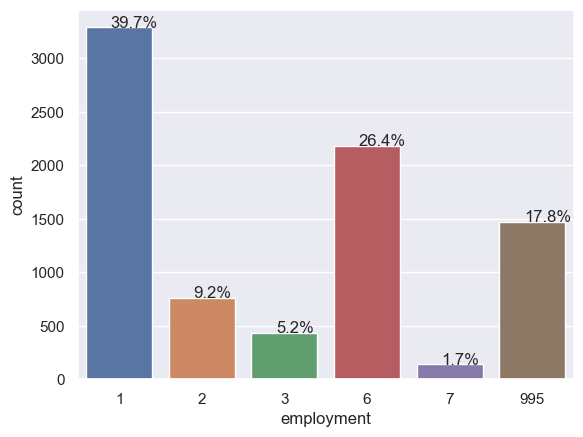

In [15]:
count_plot_percentage(data, 'employment')

* Most of the people are full-time paid employees
* Quarter of people aren't currently employed (e.g., retired, looking for work)
* Very few of people are volunteers or interns

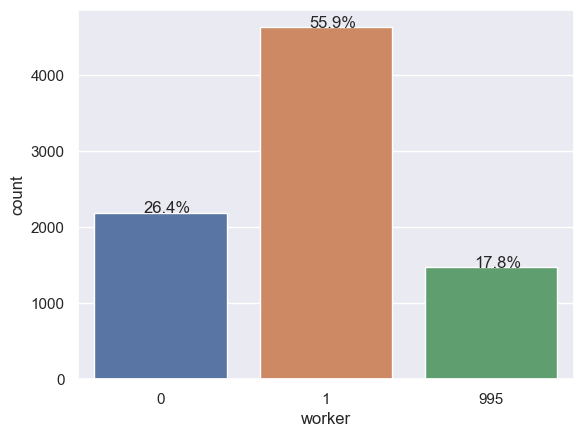

In [16]:
count_plot_percentage(data, 'worker')

* 55.9% of people are employed. Almost the half
* almost quarter of people aren't employed

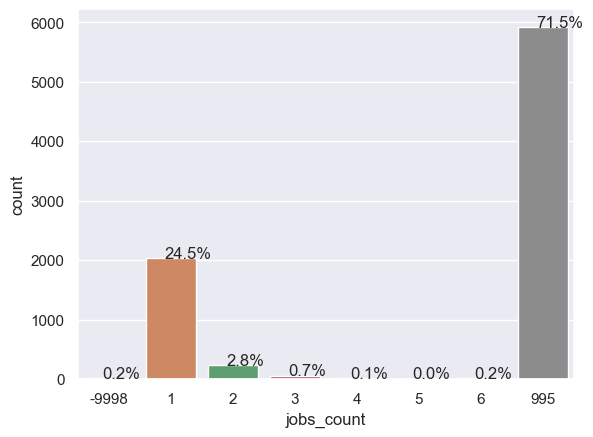

In [17]:
count_plot_percentage(data,"jobs_count")

In [18]:
data['job_type'].value_counts()

 995     5924
 1       1627
 2        497
 3        135
 4         88
-9998      15
Name: job_type, dtype: int64

Most usual work location for people is **one** work location, regardless of being a telework or onsite

In [19]:
data['industry'].value_counts().sort_values(ascending=False)

 995     5924
 8        337
 7        298
 18       247
 4        221
 1        211
 14       167
 16       129
 10       128
 15       124
 9        100
 12        91
 5         87
 17        60
 2         60
 13        43
 11        28
-9998      15
 6         13
 3          3
Name: industry, dtype: int64

* Most of them Missing: Skip logic
* Only 3 of them their work industry is: Capital goods (aerospace & defense, electrical, machinery)
* Most work industry in which people work in is: Health care/social assistance

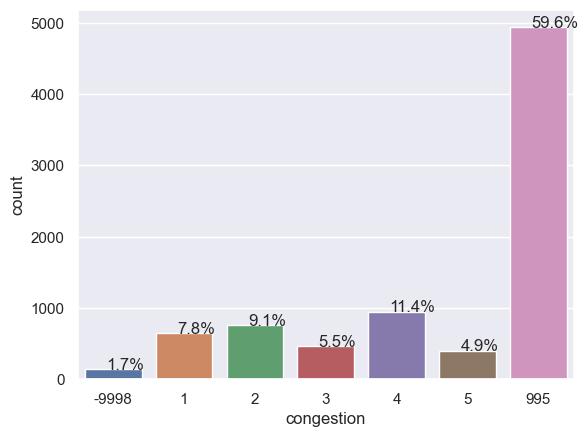

In [20]:
count_plot_percentage(data, 'congestion')

Proportion of people opposing and supporting the congistion almost equal

<AxesSubplot: xlabel='congestion', ylabel='count'>

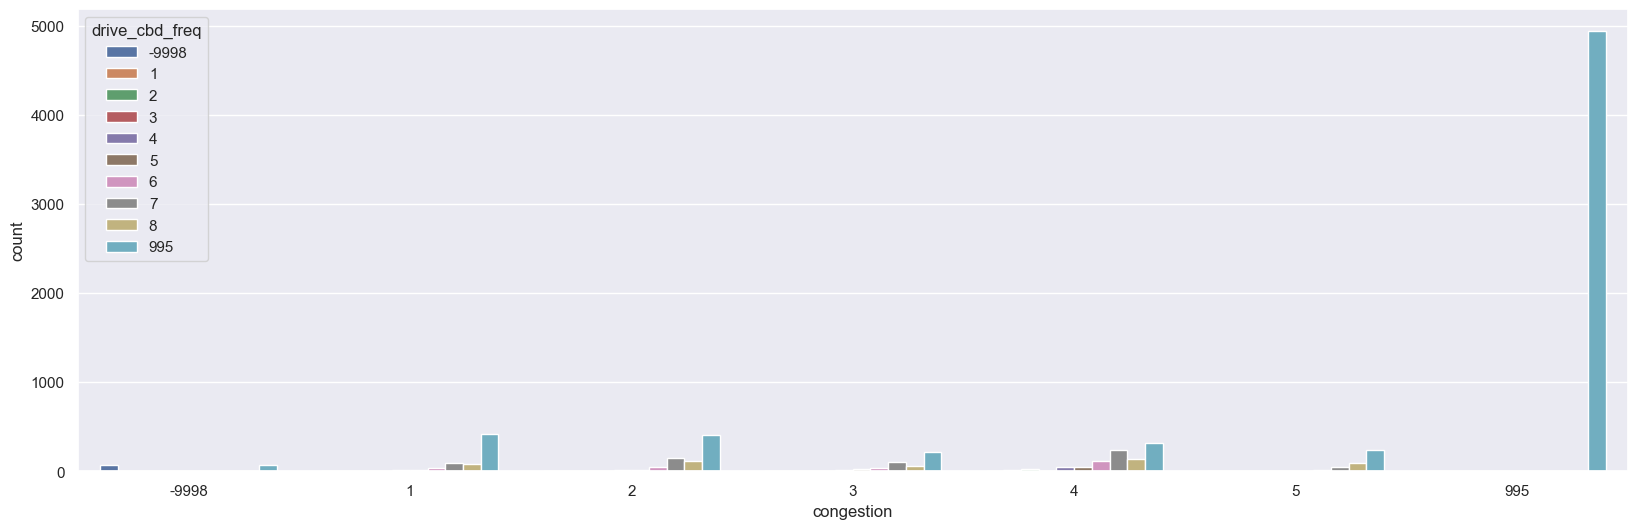

In [21]:
# Observe wheter people's frequency of driving vehicle into or within the area of Manhattan south of 60th Street affects supporting/opposing congesiton
plt.figure(figsize=(20, 6))
sns.countplot(x='congestion', hue='drive_cbd_freq', data=data)

No clear inferences, sounds that people who have never drived into or within Manhattan have almost equal voting with regard to congestion

Expect that people with more telework frequency support congestion and vice versa, let's detect that

<AxesSubplot: xlabel='telework_freq', ylabel='count'>

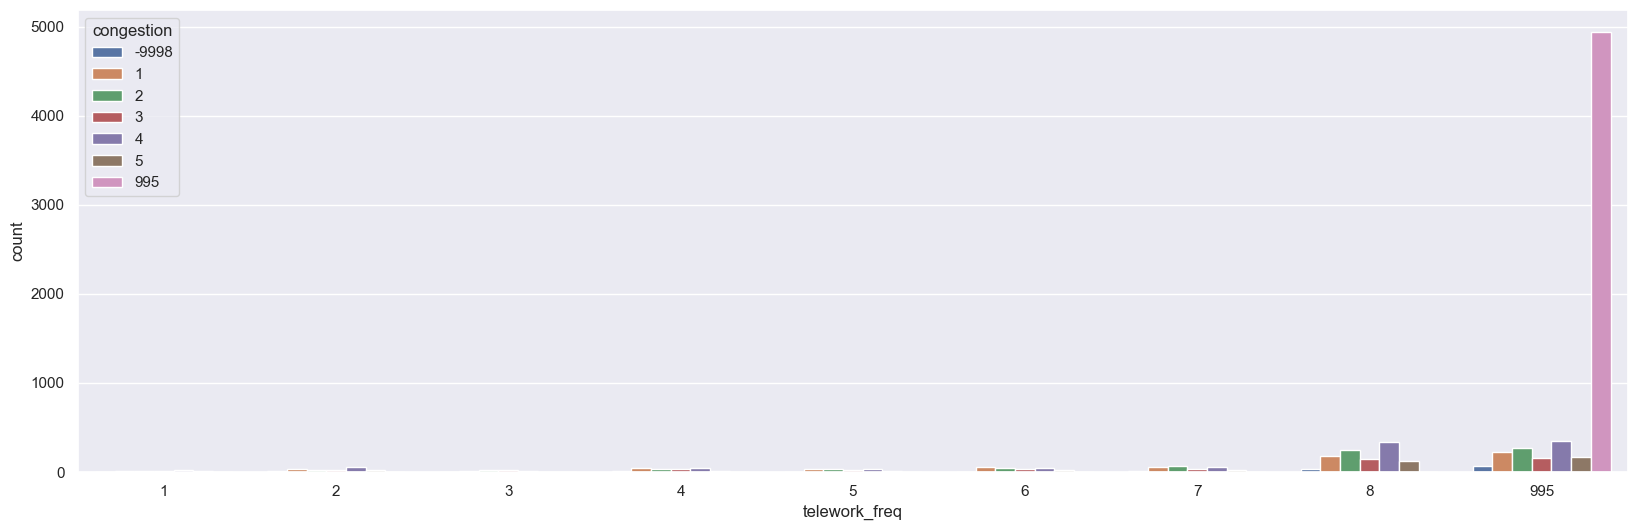

In [22]:
plt.figure(figsize=(20, 6))
sns.countplot(x='telework_freq', hue='congestion', data=data)

besides missing(skip logic), the majority voting is from people with no telework. Appear that most of them highly opposing congestion

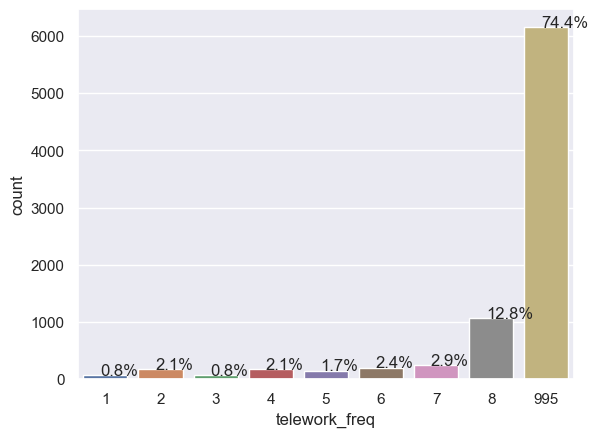

In [23]:
count_plot_percentage(data, 'telework_freq')

As detected from previous plot, majority of them are those with no telework, and missing(skip logic)

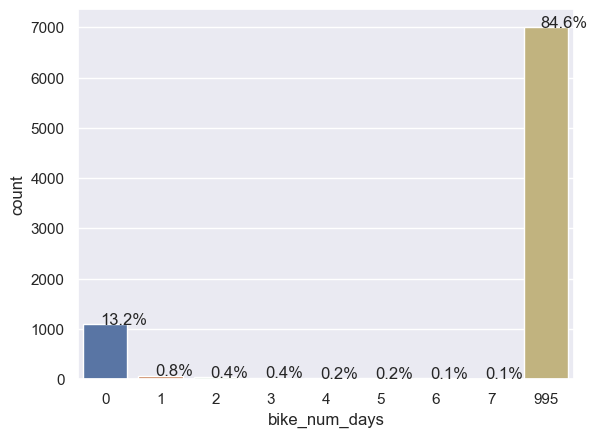

In [24]:
count_plot_percentage(data, 'bike_num_days')

Most of people don't ride a bike The whole week

<AxesSubplot: xlabel='bike_num_days', ylabel='count'>

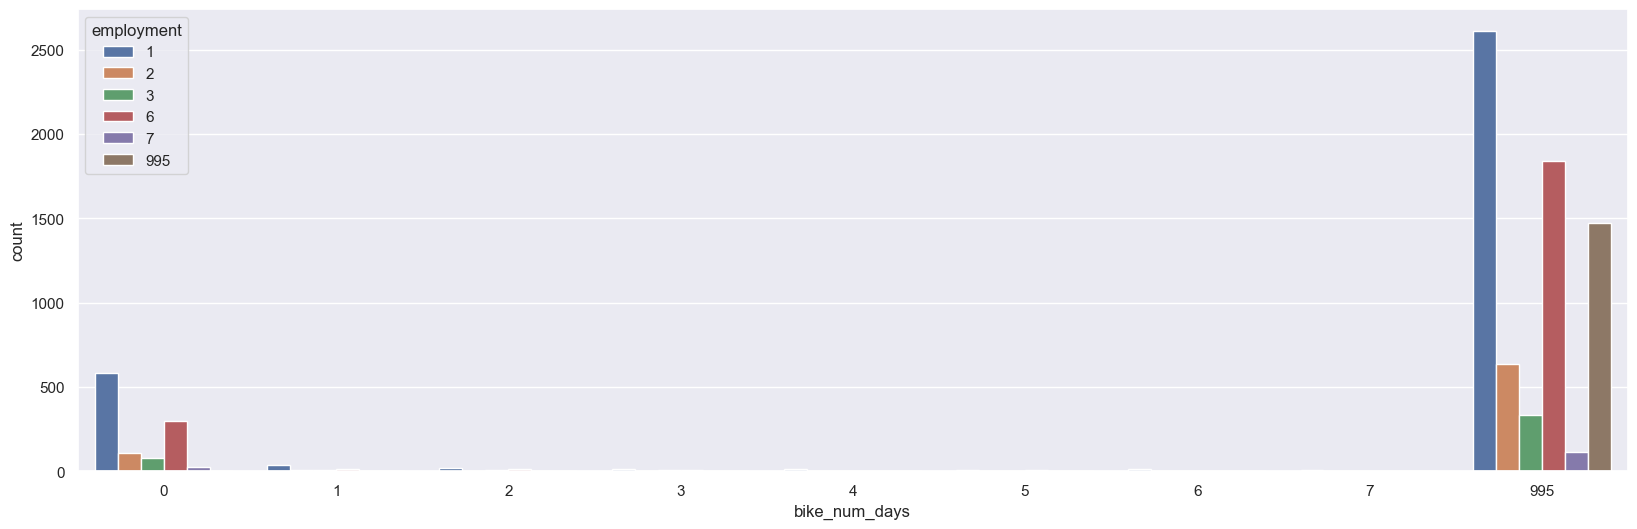

In [25]:
# Detect Bike && unemployed
plt.figure(figsize=(20, 6))
sns.countplot(x='bike_num_days', hue='employment', data=data)

In [26]:
trip_data = data[['hh_id','weight','cms_zone','survey_mode','person_id','person_num','is_participant','num_days','num_days_complete','num_trips','num_walk_trips','num_transit_trips','num_bike_trips','num_taxi_trips','num_tnc_trips','num_complete_weekend_days','num_complete_weekdays','first_travel_date','last_travel_date','made_trips','smartphone_type',
             'relationship','age','employment','worker']]

In [27]:
# Check unique values for each feature
obj = trip_data.nunique()
for key_value in obj.items():
    print(key_value)

('hh_id', 3346)
('weight', 2497)
('cms_zone', 10)
('survey_mode', 3)
('person_id', 8286)
('person_num', 11)
('is_participant', 2)
('num_days', 2)
('num_days_complete', 7)
('num_trips', 109)
('num_walk_trips', 68)
('num_transit_trips', 45)
('num_bike_trips', 25)
('num_taxi_trips', 11)
('num_tnc_trips', 14)
('num_complete_weekend_days', 3)
('num_complete_weekdays', 6)
('first_travel_date', 39)
('last_travel_date', 40)
('made_trips', 2)
('smartphone_type', 5)
('relationship', 10)
('age', 11)
('employment', 6)
('worker', 3)


In [28]:
trip_data.dtypes

hh_id                          int64
weight                       float64
cms_zone                      object
survey_mode                    int64
person_id                      int64
person_num                     int64
is_participant                 int64
num_days                     float64
num_days_complete            float64
num_trips                    float64
num_walk_trips               float64
num_transit_trips            float64
num_bike_trips               float64
num_taxi_trips               float64
num_tnc_trips                float64
num_complete_weekend_days    float64
num_complete_weekdays        float64
first_travel_date             object
last_travel_date              object
made_trips                   float64
smartphone_type                int64
relationship                   int64
age                            int64
employment                     int64
worker                         int64
dtype: object

##### hh_id & person_id will be removed, it provides no extra information about the data

In [29]:
data.drop(['hh_id','person_id','weight','first_travel_date','last_travel_date','num_days','num_days_complete'],axis=1, inplace=True)

##### only data when is_participant equals to 1 will be selected then drop the column, current information: not participant doesn't help in survey information, almost all data is null when is_participant equals to 0 

In [30]:
data_when_is_participant_zero = data[data['is_participant'] == 0]

In [31]:
data_when_is_participant_zero.replace(995,np.nan,inplace=True)

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\387034558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_when_is_participant_zero.replace(995,np.nan,inplace=True)


In [32]:
null_percentage = data_when_is_participant_zero.isna().sum().apply(lambda x:x/data_when_is_participant_zero.shape[0]*100).sort_values(ascending=False)[data_when_is_participant_zero.isna().sum()>0] 

<AxesSubplot: >

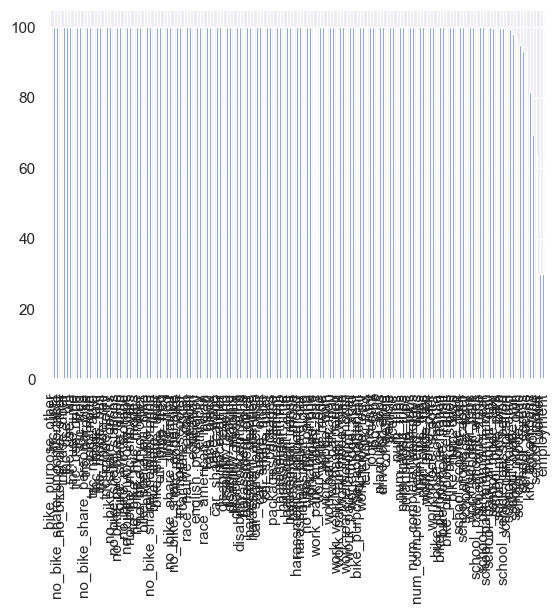

In [33]:
null_percentage.plot(kind='bar')

##### as a result person_num and relationship feature will be deleted because they have on value

In [34]:
data.drop(['person_num','relationship'],axis=1,inplace=True)

In [35]:
trips_numerical_data = data[['num_trips','num_walk_trips','num_transit_trips','num_bike_trips','num_taxi_trips','num_tnc_trips','num_complete_weekend_days',
                      'num_complete_weekdays']]

In [36]:
trips_numerical_data.describe()

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000
mean,25.540646,10.004782,5.827555,0.419307,0.111775,0.374776,1.266886,3.067244
std,21.900434,12.091553,7.646751,2.141812,1.664201,1.181070,0.843984,1.858192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,24.000000,5.000000,2.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,41.000000,16.000000,10.000000,0.000000,0.000000,0.000000,2.000000,5.000000
max,178.000000,93.000000,57.000000,36.000000,92.000000,18.000000,2.000000,5.000000


##### from the frequency matrix -columns features, rows values- 
##### for example count of 1 of survey_mode is the most frequent which means people filled the survey by using rMove (smartphone app)
##### Northern Bronx is the most frequent cms_zone
##### Age values are between 5 and 11, which means 18yo and older
##### most answers from people has iphone mobile 

In [37]:
categorical_data = data[['made_trips','smartphone_type','age','cms_zone','survey_mode']]

##### See Frequency/Count for each value of the categorical features

In [38]:
categorical_frequency = categorical_data.apply(pd.Series.value_counts)
categorical_frequency

,made_trips,smartphone_type,age,cms_zone,survey_mode
0.0,309.0,377.0,NaN,NaN,NaN
1.0,3037.0,1206.0,405.0,NaN,6495.0
2.0,NaN,1747.0,871.0,NaN,1538.0
3.0,NaN,16.0,197.0,NaN,253.0
4.0,NaN,NaN,795.0,NaN,NaN
5.0,NaN,NaN,1502.0,NaN,NaN
6.0,NaN,NaN,1225.0,NaN,NaN
7.0,NaN,NaN,1186.0,NaN,NaN
8.0,NaN,NaN,1067.0,NaN,NaN
9.0,NaN,NaN,696.0,NaN,NaN


<AxesSubplot: >

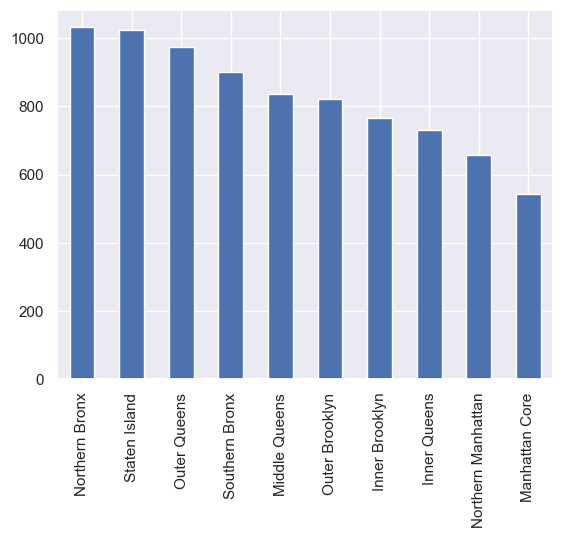

In [39]:
categorical_data['cms_zone'].value_counts().plot(kind='bar')


In [40]:
school_numerical_data = data[['school_park_amount_day','school_park_amount_week','school_park_amount_month','school_park_amount_year']]

In [41]:
school_categorical_data = data[['student','license','vehicle','congestion','school_type','school_cms_zone',
                                       'missing_school_location','kid_accompany','school_mode','school_mode_own','school_park_location',
                                       'school_vehicle_pass_period', 'school_mode_auto', 'school_mode_bus','school_mode_rail', 'school_mode_ferry', 'school_access',
                                       'school_egress', 'school_mode_taxi', 'school_mode_bike','school_bike_park', 'school_mode_scooter', 'school_scooter_park']]

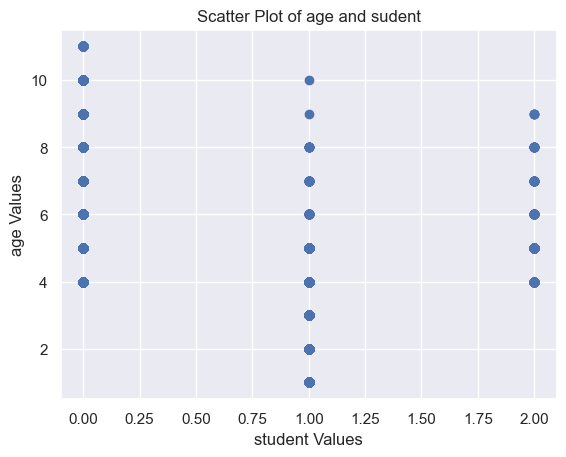

In [42]:
# Plot a scatter plot of two features
plt.scatter(data['student'], data['age'])
plt.title('Scatter Plot of age and sudent')
plt.xlabel('student Values')
plt.ylabel('age Values')
plt.show()

#### from the plot
##### not students age varies between 4(18-24) and 11(85 or older)
##### full time student age varies between 1(Under 5) and 10(75-84)
##### half-time student age varies between 4(18-24) and 9(65-74)

<AxesSubplot: >

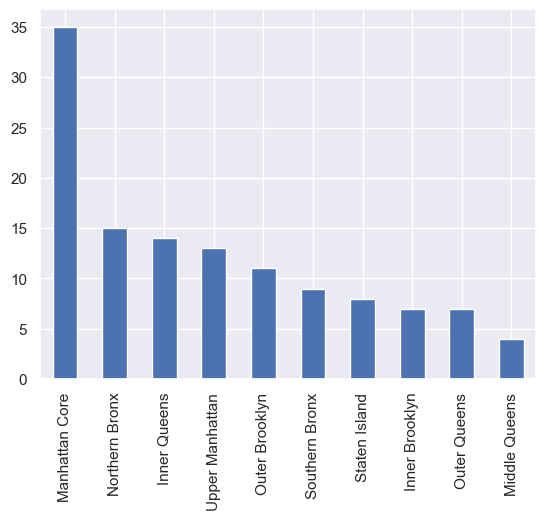

In [43]:
school_categorical_data['school_cms_zone'].value_counts().plot(kind='bar')

##### Manhattan Core has the highest number of school

<AxesSubplot: >

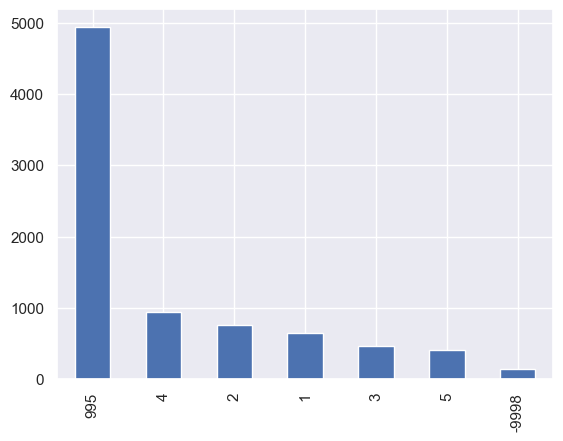

In [44]:
school_categorical_data['congestion'].value_counts().plot(kind='bar')

##### high number of people don't agree with the policy of congestion pricing (4)

In [45]:
school_numerical_data.describe()

,school_park_amount_day,school_park_amount_week,school_park_amount_month,school_park_amount_year
count,7.000000,5.000000,8.000000,8.000000
mean,7.892857,21.050000,23.781250,128.156250
std,6.177677,28.202615,21.036294,161.335882
min,0.250000,0.250000,0.250000,0.250000
25%,3.000000,4.000000,12.250000,12.250000
50%,8.000000,15.000000,18.000000,53.000000
75%,12.500000,16.000000,31.250000,212.500000
max,16.000000,70.000000,60.000000,450.000000


In [46]:
# display correlation matrix between features
numeric_corr_matrix = school_numerical_data.corr()
numeric_corr_matrix

,school_park_amount_day,school_park_amount_week,school_park_amount_month,school_park_amount_year
school_park_amount_day,1.0,1.0,1.0,1.0
school_park_amount_week,1.0,1.0,1.0,1.0
school_park_amount_month,1.0,1.0,1.0,1.0
school_park_amount_year,1.0,1.0,1.0,1.0


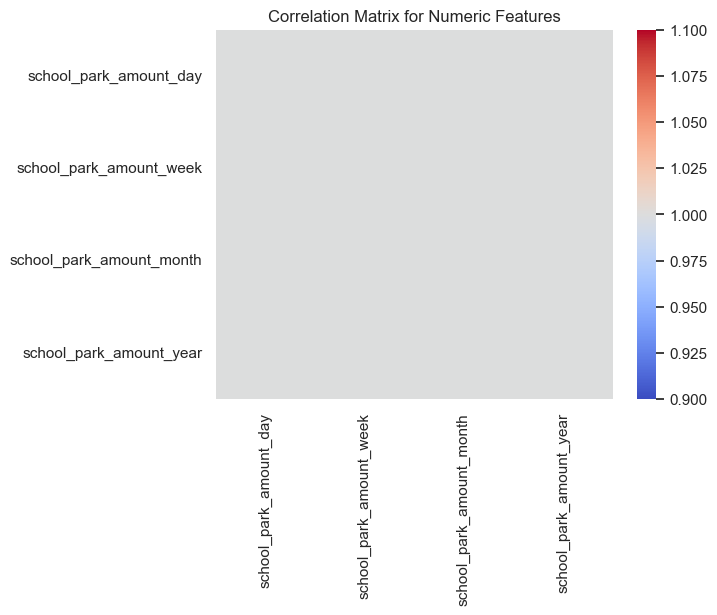

In [47]:
# Plot a correlation matrix for numeric features
sns.heatmap(numeric_corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [48]:
school_numerical_data.isna().mean()

school_park_amount_day      0.999155
school_park_amount_week     0.999397
school_park_amount_month    0.999035
school_park_amount_year     0.999035
dtype: float64

In [49]:
harassment_data = data[['harassment','harassment_private_car', 'harassment_alone', 'harassment_attention',
       'harassment_defense', 'harassment_other', 'harassment_none', 'gender',
       'education', 'english_proficiency', 'ethnicity', 'race_american_indian',
       'race_asian', 'race_black', 'race_native_hawaiian', 'race_white',
       'race_other', 'disability_hearing', 'disability_seeing',
       'disability_walking', 'disability_mobility', 'disability_dressing',
       'disability_concentrating', 'disability_none']]

<AxesSubplot: >

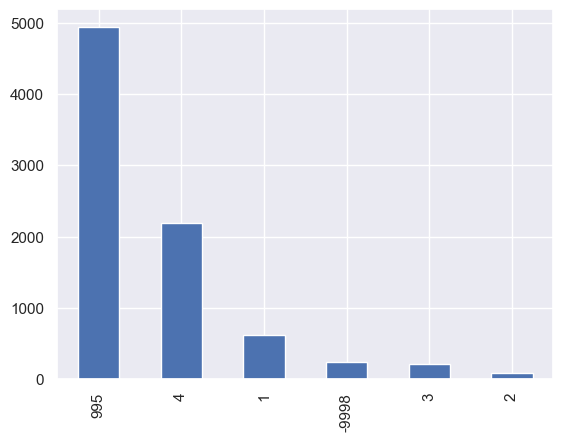

In [50]:
harassment_data['harassment'].value_counts().plot(kind='bar')

##### most haven't seen or experienced harassment (4)

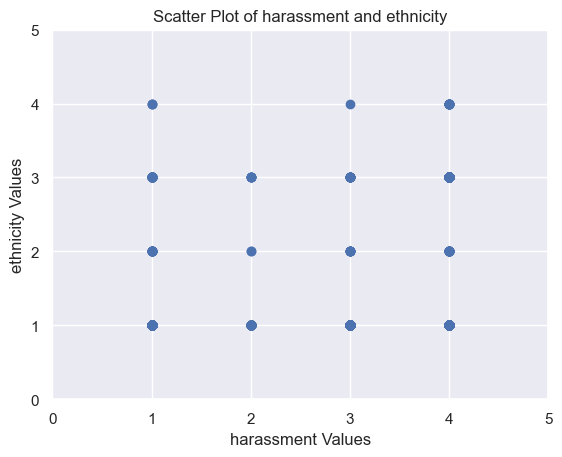

In [51]:
# Plot a scatter plot of two features
plt.scatter(harassment_data['harassment'], harassment_data['ethnicity'])
plt.title('Scatter Plot of harassment and ethnicity')
plt.xlabel('harassment Values')
plt.ylabel('ethnicity Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### all have seen and/or experienced harassment, and mexican people seem to experience it the most

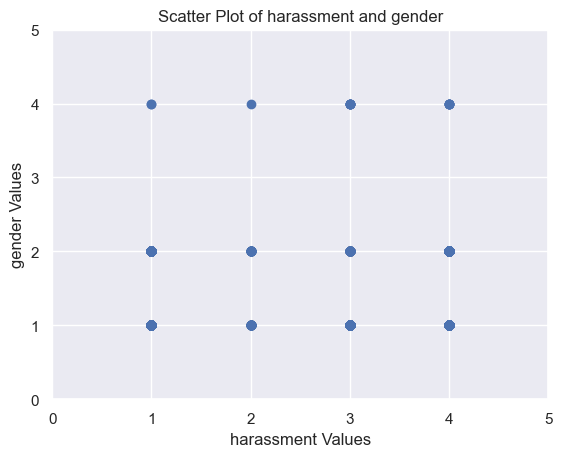

In [52]:
plt.scatter(harassment_data['harassment'], harassment_data['gender'])
plt.title('Scatter Plot of harassment and gender')
plt.xlabel('harassment Values')
plt.ylabel('gender Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### all genders are equal

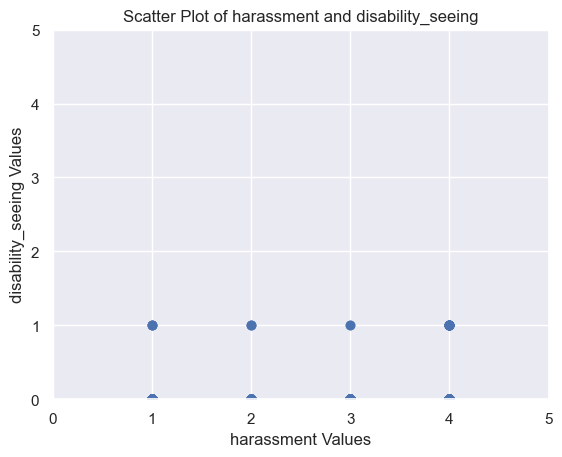

In [53]:
plt.scatter(harassment_data['harassment'], harassment_data['disability_seeing'])
plt.title('Scatter Plot of harassment and disability_seeing')
plt.xlabel('harassment Values')
plt.ylabel('disability_seeing Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### disabilities doesn't really affect

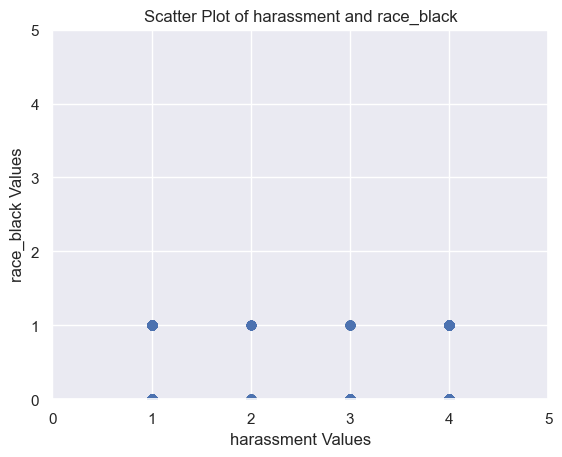

In [54]:
plt.scatter(harassment_data['harassment'], harassment_data['race_black'])
plt.title('Scatter Plot of harassment and race_black')
plt.xlabel('harassment Values')
plt.ylabel('race_black Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### black or other doesn't affect

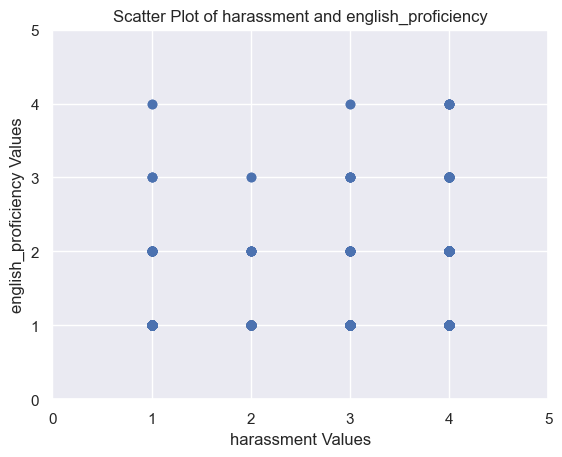

In [55]:
plt.scatter(harassment_data['harassment'], harassment_data['english_proficiency'])
plt.title('Scatter Plot of harassment and english_proficiency')
plt.xlabel('harassment Values')
plt.ylabel('english_proficiency Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

* who speaks english well got harassment
* who does not speak english not at all have not  experienced harassmen

In [56]:
package_data = data[['packages','packages_distance']]

In [57]:
package_frequency = package_data.apply(pd.Series.value_counts)
package_frequency

,packages,packages_distance
-9998,234,NaN
1,696,44.0
2,1283,98.0
3,312,161.0
4,163,93.0
5,152,29.0
6,150,40.0
7,163,NaN
8,193,NaN
995,4940,7821.0


<AxesSubplot: >

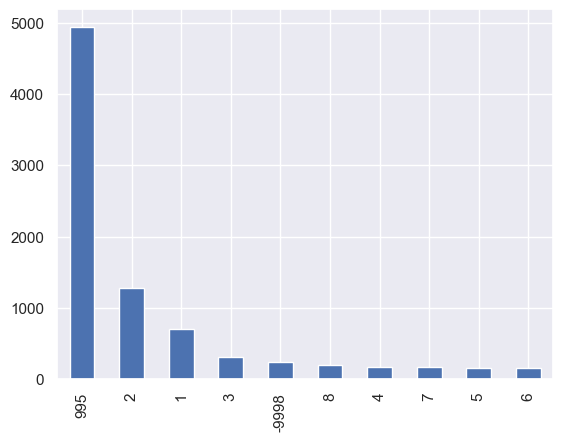

In [58]:
package_data['packages'].value_counts().plot(kind='bar')

#### most people recieve their packages at their doorsteps

<AxesSubplot: >

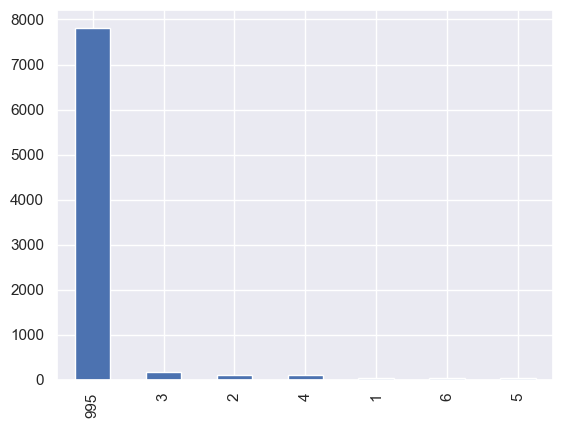

In [59]:
package_data['packages_distance'].value_counts().plot(kind='bar')

#### most people move 3 blocks away ((around neighbourhood)) to get their packages 
###### 1 block = 15 meters

In [60]:
numerical_data= pd.concat([trips_numerical_data,school_numerical_data],axis=1)

In [61]:
numerical_data['school_park_amount_year'].unique()

array([    nan, 9.0e+01, 4.5e+02, 2.5e+02, 2.0e+02, 2.5e-01, 4.0e+00,
       1.6e+01, 1.5e+01])

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


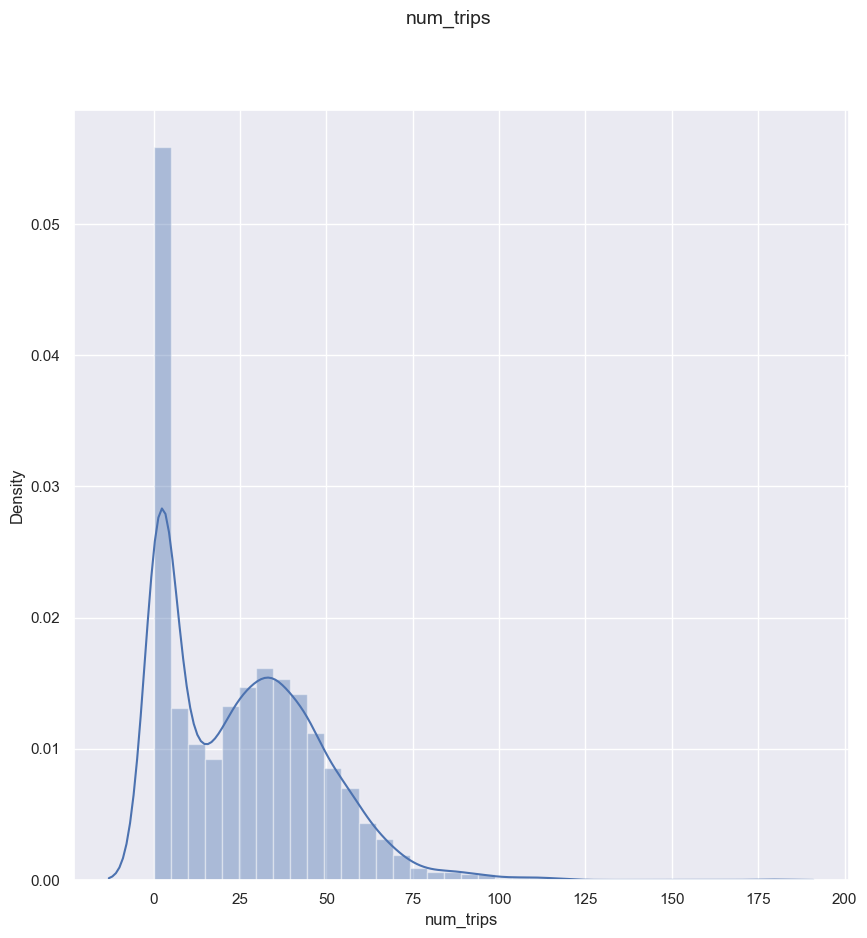

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


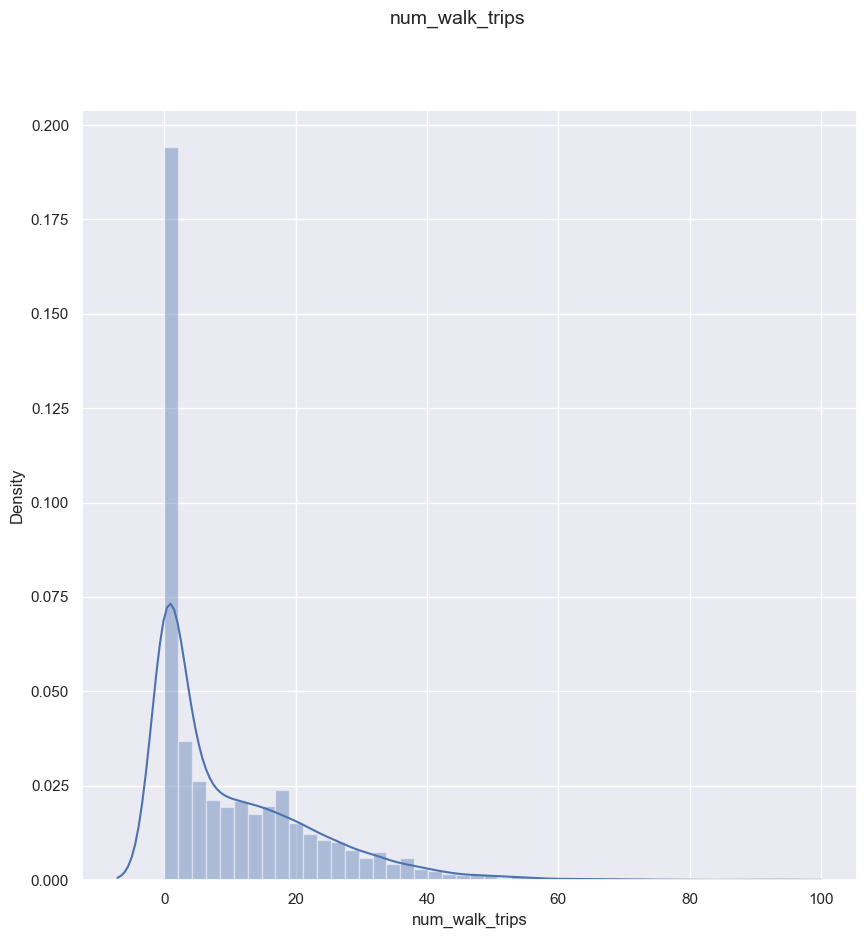

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


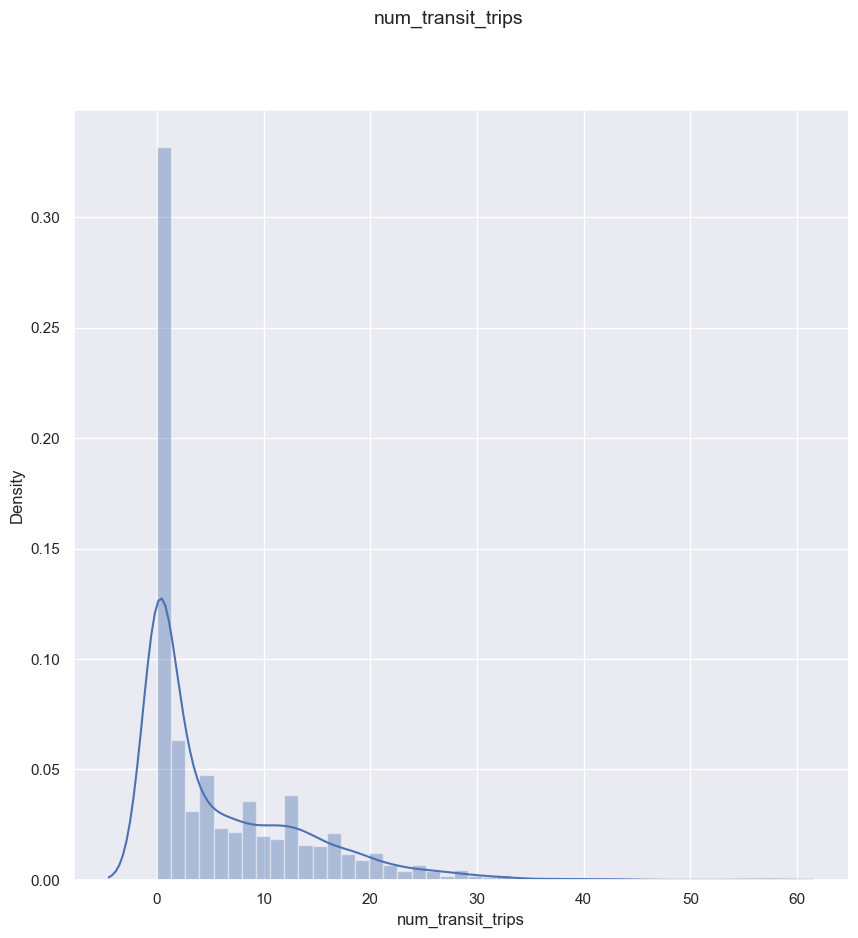

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


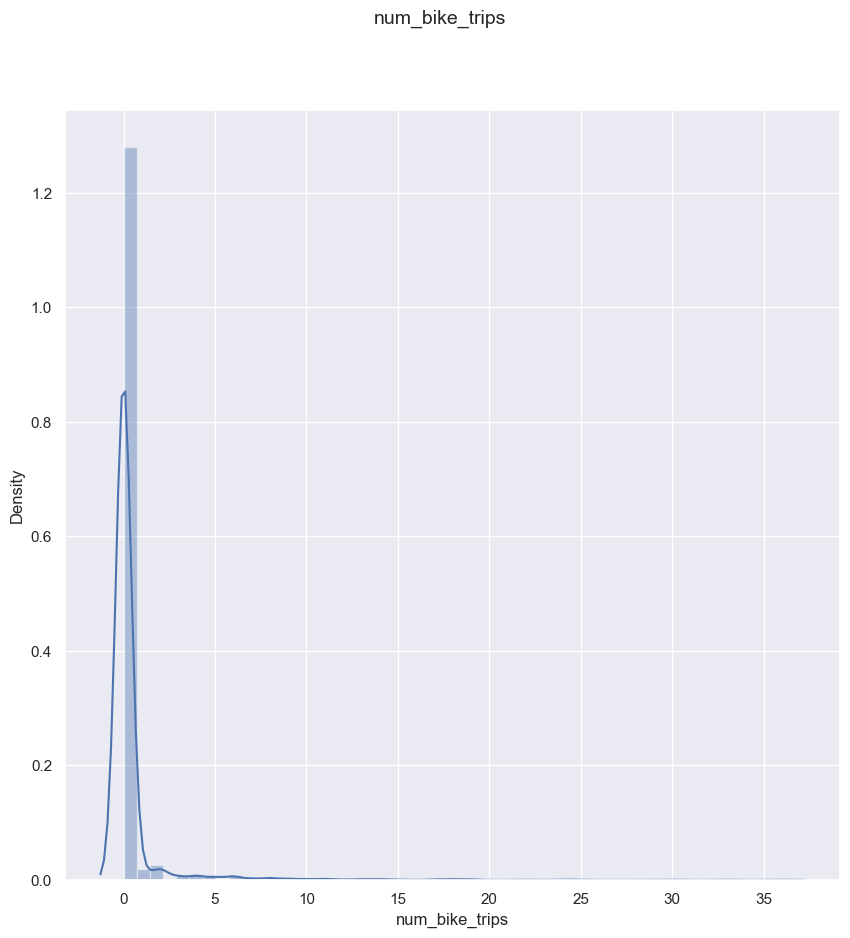

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


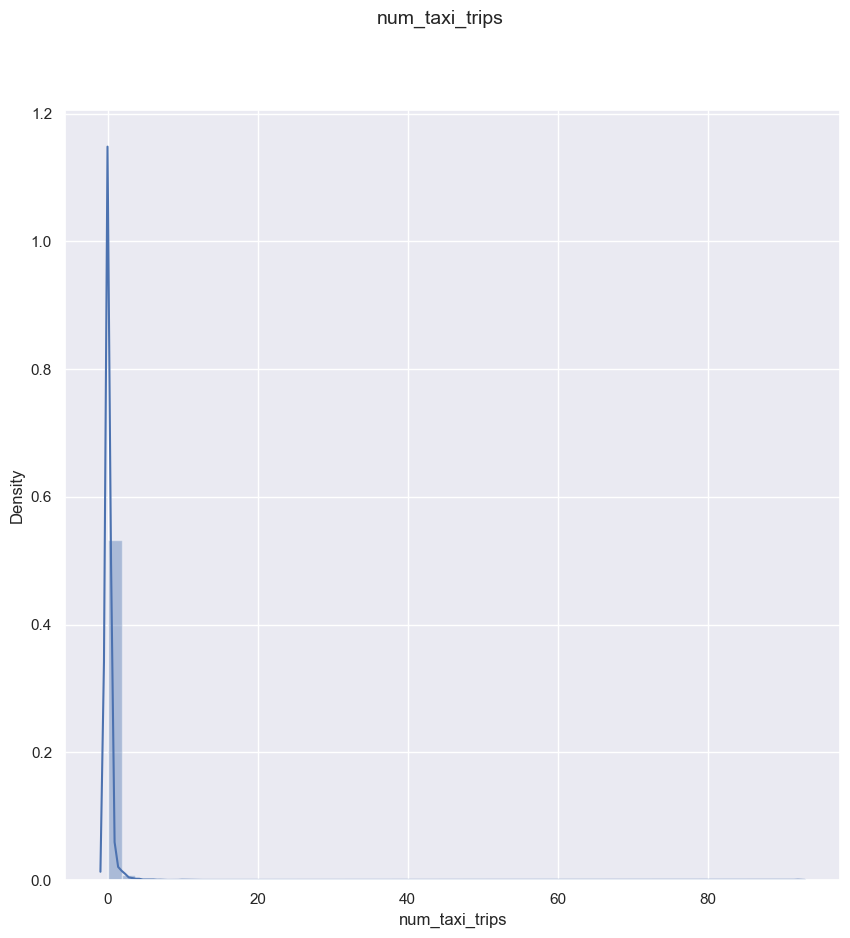

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


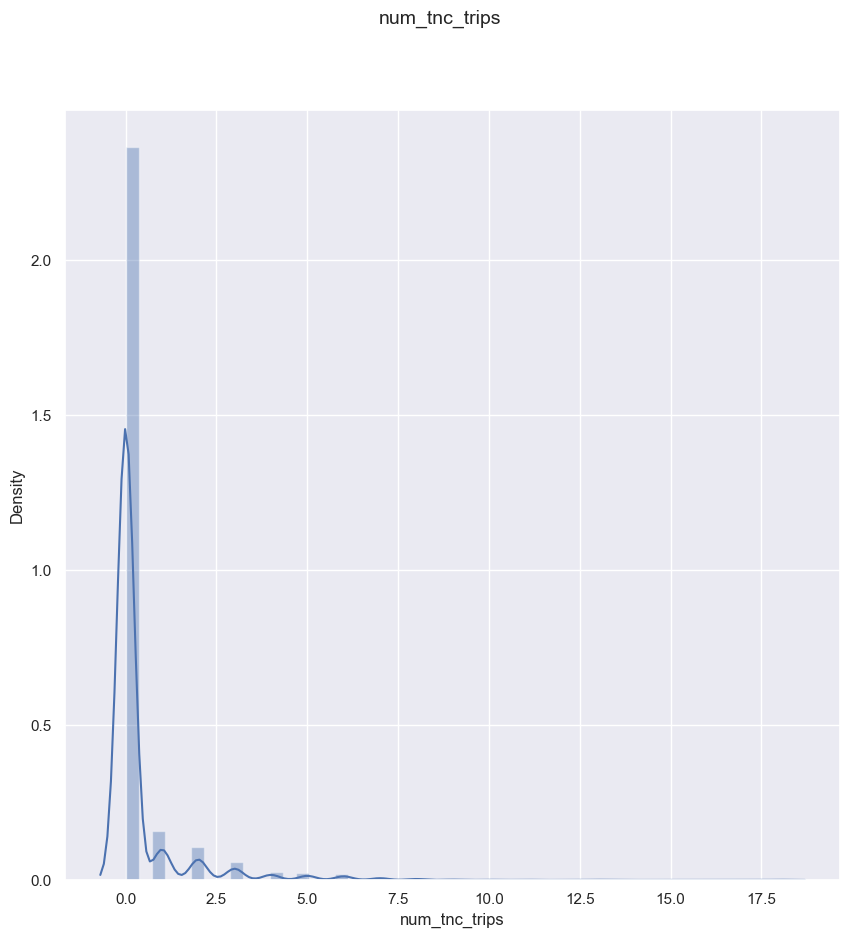

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


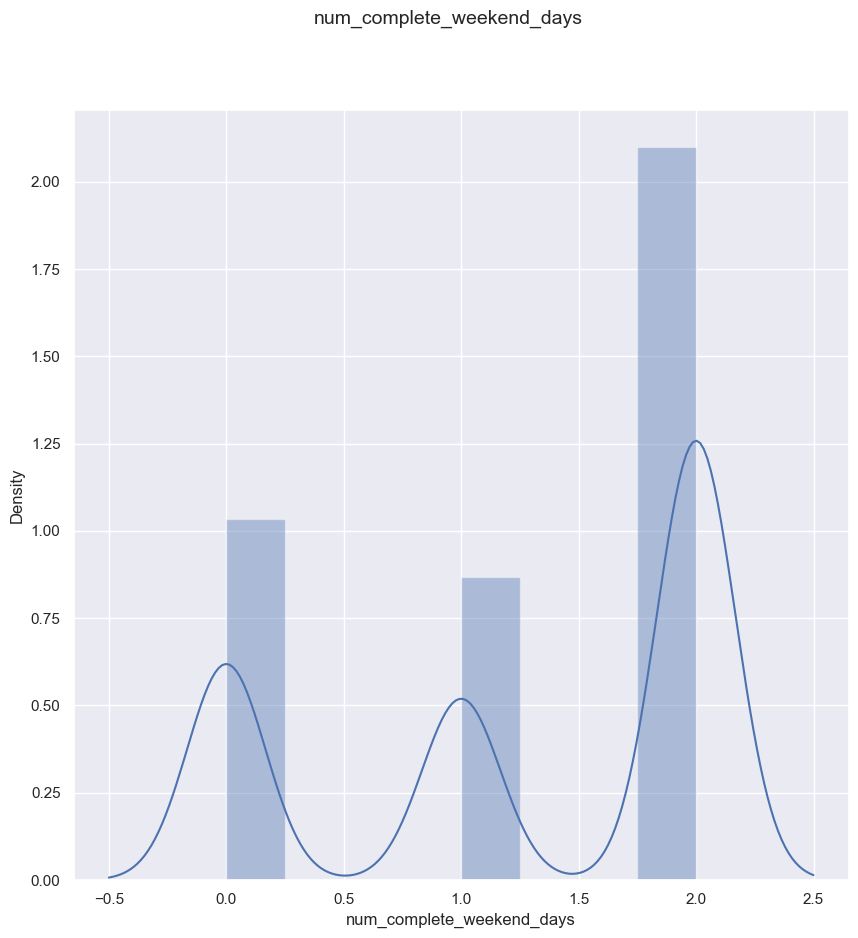

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


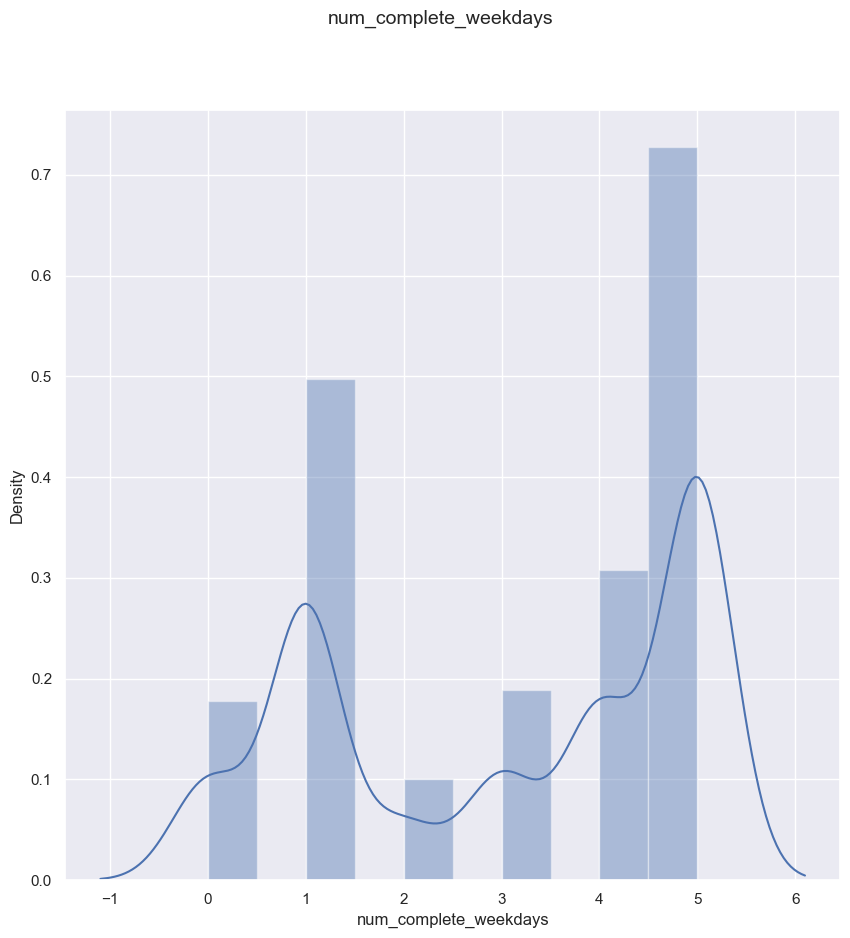

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


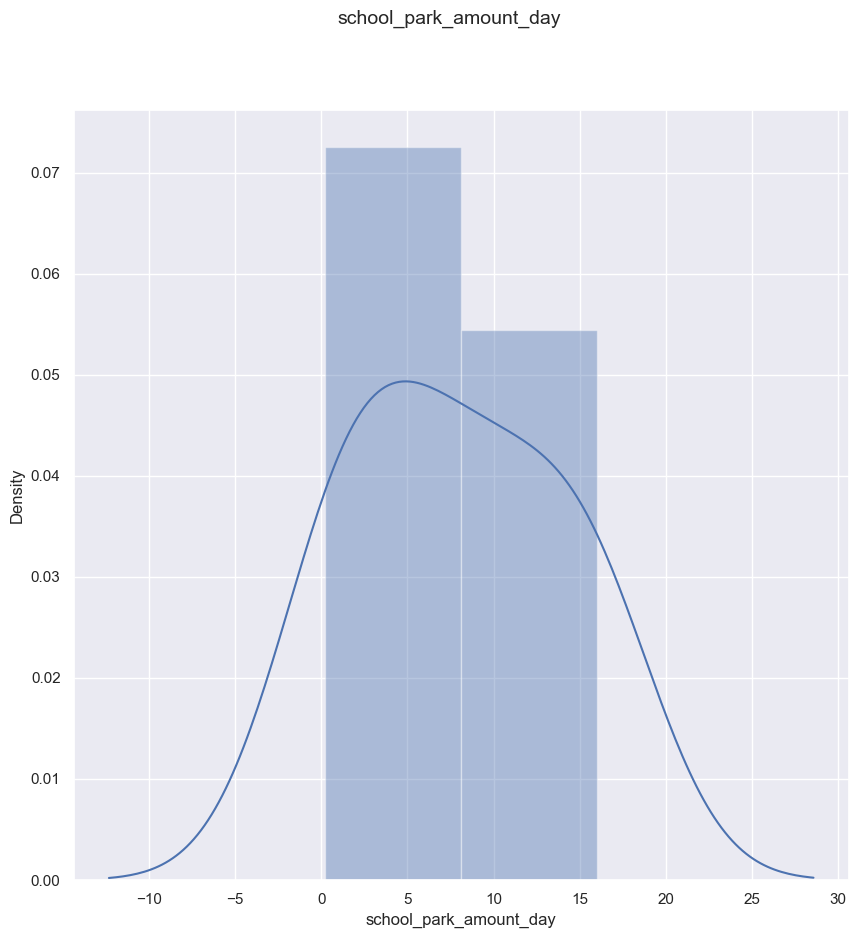

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


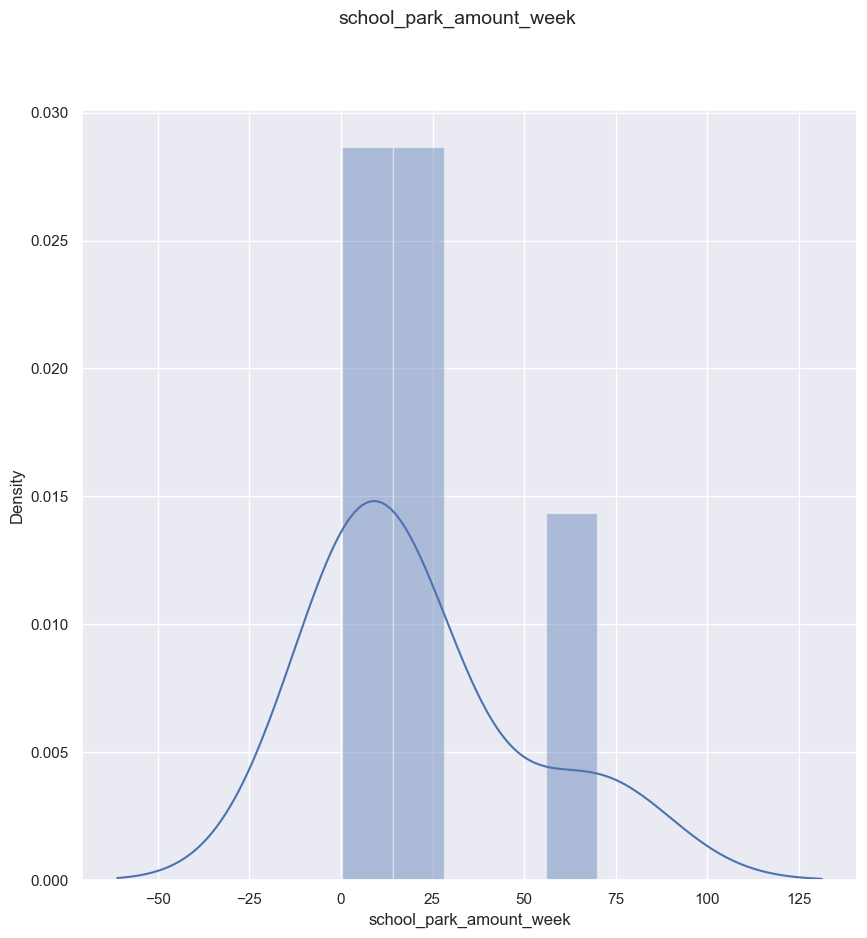

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


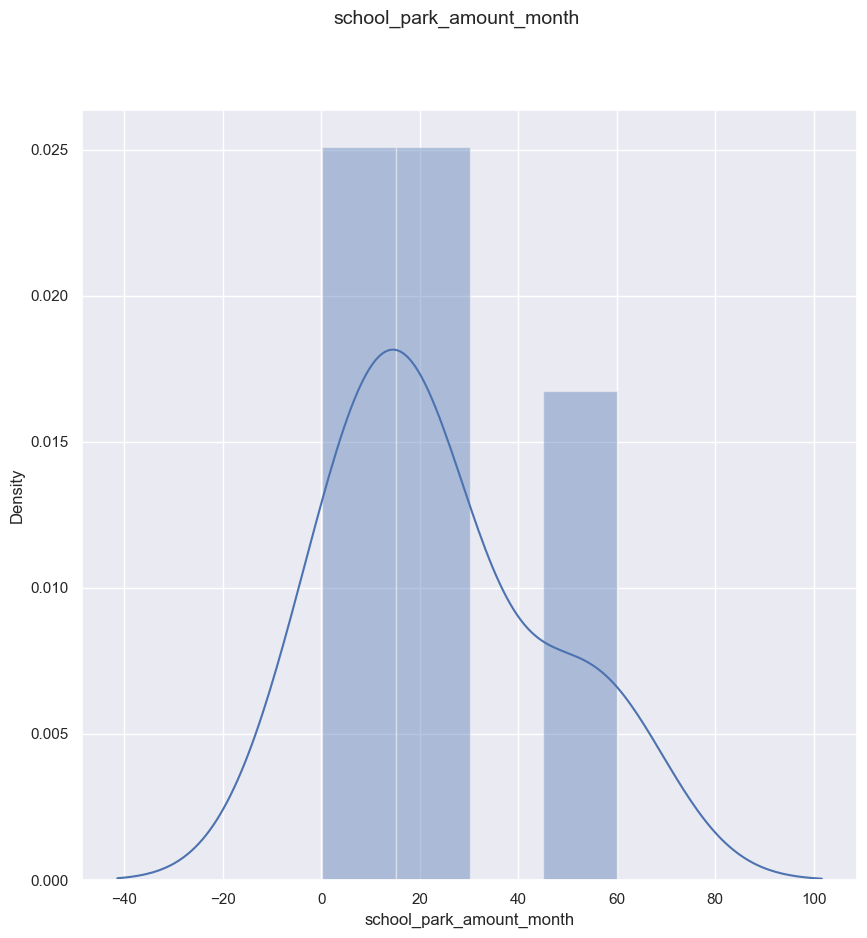

C:\Users\nasser\AppData\Local\Temp\ipykernel_5936\2257759361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


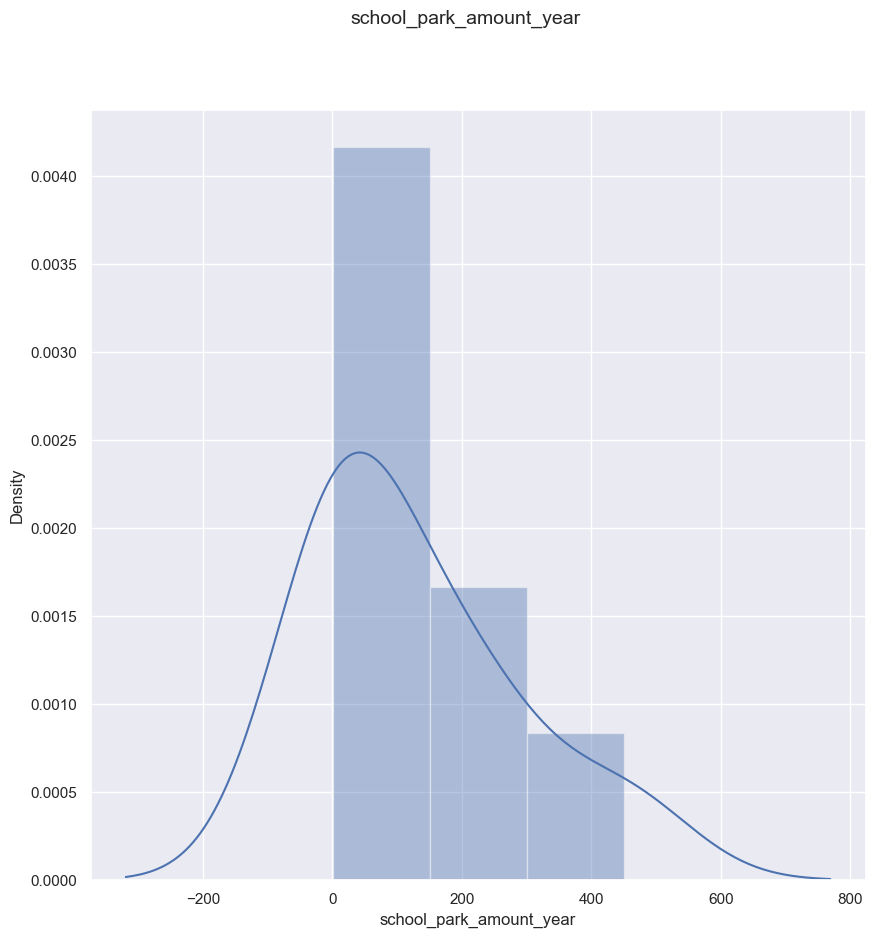

In [62]:
#plots help us to decide what to do in feature engineering
def plots_(data,feature): 
        fig, ax = plt.subplots(1, figsize=(10,10), sharey=True)
        fig.suptitle(feature, fontsize=14)
        sns.distplot(data[feature], ax=ax)
        plt.show()

for column in numerical_data:
    feature=plots_(numerical_data, column)

##### skewed data such as ['num_walk_trips', 'num_transit_trips','num_bike_trips','num_taxi_trips','num_tnc_trips'] will be log transformed to reduce skewness before scaling
##### bimodal distribution ['num_trips','school_park_amount_weak' ,'school_park_amount_month'] normalization or standardization can be applied 
##### multimodal distribution ['num_complete_weekdays', 'num_complete_weekend_days'] normalization or standardization can be applied

# Missing Values

convert the -9998 value to NaN to handle it also with missing values

In [63]:
for column in data.columns:
    data[column] = data[column].replace(-9998,np.nan)
    data[column] = data[column].replace("-9998",np.nan)

compute the percentage of null values of each column

In [64]:
null_percentage = data.isna().sum().apply(lambda x:x/data.shape[0]*100).sort_values(ascending=False)[data.isna().sum()>0] 

<AxesSubplot: >

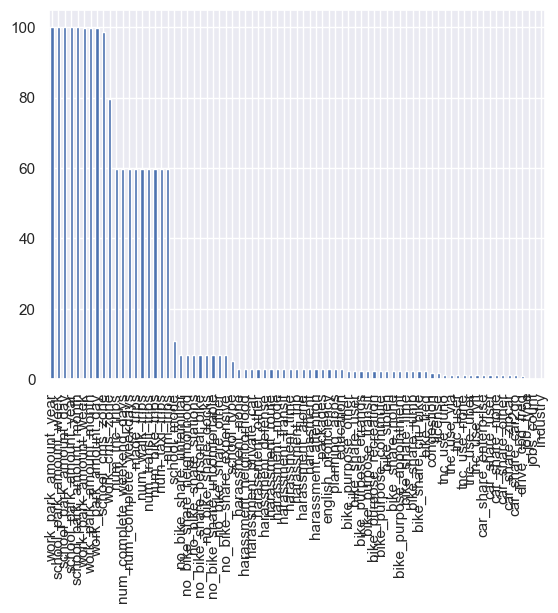

In [65]:
null_percentage.plot(kind='bar')

remove any column have more than 50% NULL

In [66]:
print(f"before Remove  {data.shape}")
data.drop(columns=null_percentage[null_percentage>50].index.to_list(),inplace=True)
print(f"after Remove  {data.shape}")


before Remove  (8286, 156)
after Remove  (8286, 137)


for the rest we will remove any row have null value

In [67]:
print(f"before Remove  {data.shape}")
data = data.dropna(axis=0)
print(f"after Remove  {data.shape}")

# Fill data having null percentage less than 50% with mode(), as most of the data are nominal  
# # Fill null data
# def fill_null_values(dataframe):
#     for column in dataframe:
#         dataframe[column].fillna(dataframe[column].mode()[0],inplace=True)
#     return dataframe
# data = fill_null_values(data)

before Remove  (8286, 137)
after Remove  (6728, 137)


remove any row have is_participant value not 1 becouse all the rest of the values are null

In [68]:
print(f"before Remove  {data.shape}")
data = data[data["is_participant"]==1]
print(f"after Remove  {data.shape}")

before Remove  (6728, 137)
after Remove  (2692, 137)


# Encoding Features

In [69]:
with open("data/columns_encoding.json") as file:
    columns_dictionary = json.loads(file.read()) # read the file as string and convert it to dictionary

In [70]:
columns_dictionary

{'survey_mode': {'1': 'rMove',
  '2': 'rSurvey',
  '3': 'Call center',
  '995': 'skip logic'},
 'is_participant': {'0': 'Not selected', '1': 'Selected', '995': 'skip logic'},
 'made_trips': {'0': 'Not selected', '1': 'Selected', '995': 'skip logic'},
 'relationship': {'0': 'Self',
  '1': 'Spouse or partner',
  '2': 'Son or daughter',
  '3': 'Father or mother',
  '4': 'Brother or sister',
  '5': 'Other relative',
  '6': 'Roommate or friend',
  '7': 'Household help',
  '995': 'skip logic'},
 'age': {'1': 'Under 5',
  '2': '5-15',
  '3': '16-17',
  '4': '18-24',
  '5': '25-34',
  '6': '35-44',
  '7': '45-54',
  '8': '55-64',
  '9': '65-74',
  '10': '75-84',
  '11': '85 or older',
  '995': 'skip logic'},
 'employment': {'1': 'Employed full-time',
  '2': 'Employed part-time',
  '3': 'Primarily self-employed',
  '6': 'Not currently employed',
  '7': 'Unpaid volunteer or intern',
  '995': 'skip logic'},
 'worker': {'0': 'Not employed', '1': 'Employed', '995': 'skip logic'},
 'student': {'0': 

In [71]:
unique_zones_values = data['cms_zone'].unique()
res_dct = {zone:zone for zone in  unique_zones_values }
res_dct

{'Inner Brooklyn': 'Inner Brooklyn',
 'Middle Queens': 'Middle Queens',
 'Outer Queens': 'Outer Queens',
 'Manhattan Core': 'Manhattan Core',
 'Northern Bronx': 'Northern Bronx',
 'Staten Island': 'Staten Island',
 'Northern Manhattan': 'Northern Manhattan',
 'Inner Queens': 'Inner Queens',
 'Outer Brooklyn': 'Outer Brooklyn',
 'Southern Bronx': 'Southern Bronx'}

In [72]:
columns_dictionary['cms_zone'] = res_dct

for each column_name in the dictionary encode the data using the dictionary values to create one_hot_encoding

In [73]:
for column_name in columns_dictionary:
    data = one_hot_encoding(data=data,column=column_name,dictionary=columns_dictionary[column_name])

In [74]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [75]:
data.select_dtypes(include='object').columns 

Index([], dtype='object')

select numeric features only to apply kmeans on them

In [76]:
numeric_fetures = data.select_dtypes(include=np.number).columns.tolist()
data_numeric = data[numeric_fetures]
data_numeric.shape

(2692, 295)

In [77]:
# jobs_count  و bike_num_days solve 995 problem


In [78]:
data_numeric['jobs_count'].unique()

array([995.,   1.,   2.,   3.,   4.,   5.,   6.])

In [79]:
data_numeric['jobs_count'] = data_numeric['jobs_count'].replace(995,7)

In [80]:
data_numeric['jobs_count'].unique()

array([7., 1., 2., 3., 4., 5., 6.])

In [81]:
data_numeric['bike_num_days'].unique()

array([  2,   0,   5, 995,   3,   1,   4,   6,   7], dtype=int64)

In [82]:
data_numeric['bike_num_days'] = data_numeric['bike_num_days'].replace(995,8)

In [83]:
data_numeric['bike_num_days'].unique()

array([2, 0, 5, 8, 3, 1, 4, 6, 7], dtype=int64)

apply Standard Scaler on the Data

In [84]:
data_numeric_standarized = StandardScaler().fit_transform(data_numeric)
data_numeric_standarized = pd.DataFrame(data_numeric_standarized, columns = data_numeric.columns)
data_numeric_standarized.head()
# data_numeric_standarized = data_numeric

,smartphone_type,jobs_count,bike_num_days,survey_mode_Call center,survey_mode_rMove,survey_mode_rSurvey,is_participant_Selected,age_18-24,age_25-34,age_35-44,...,cms_zone_Inner Brooklyn,cms_zone_Inner Queens,cms_zone_Manhattan Core,cms_zone_Middle Queens,cms_zone_Northern Bronx,cms_zone_Northern Manhattan,cms_zone_Outer Brooklyn,cms_zone_Outer Queens,cms_zone_Southern Bronx,cms_zone_Staten Island
0,-0.507334,1.426171,-0.733478,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,3.402858,-0.313572,-0.287861,-0.329745,-0.387216,-0.30492,-0.333883,-0.359437,-0.348137,-0.365993
1,0.873600,-0.746786,-1.254324,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,-0.293871,-0.313572,-0.287861,3.032651,-0.387216,-0.30492,-0.333883,-0.359437,-0.348137,-0.365993
2,0.873600,-0.746786,-1.254324,-0.252213,0.679305,-0.586502,0.0,-0.274007,-0.500348,-0.491045,...,-0.293871,-0.313572,-0.287861,3.032651,-0.387216,-0.30492,-0.333883,-0.359437,-0.348137,-0.365993
3,0.873600,-0.746786,0.047789,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,-0.293871,-0.313572,-0.287861,3.032651,-0.387216,-0.30492,-0.333883,-0.359437,-0.348137,-0.365993
4,-0.507334,-0.384626,0.829057,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,-0.293871,-0.313572,-0.287861,-0.329745,-0.387216,-0.30492,-0.333883,2.782132,-0.348137,-0.365993


# Hyper Parameter Tuning

finding the optimal k using elbow

In [85]:
result = []
potential_k = list(range(2, 21))
for k in potential_k:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data_numeric_standarized)
  result.append(kmeans.inertia_)

In [86]:
result[1:5]

[717098.6195971773, 699485.7881281314, 692255.671390112, 677417.487099048]

In [87]:
optimal_k_elbow = result[1:5].index(min(result[1:5]))+1

finding the optimal k using silhouette_score

In [88]:
sil = []
kmax = 20
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_numeric_standarized)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_numeric_standarized, labels, metric = 'euclidean'))

In [89]:
result = [value/10000 for value in result]

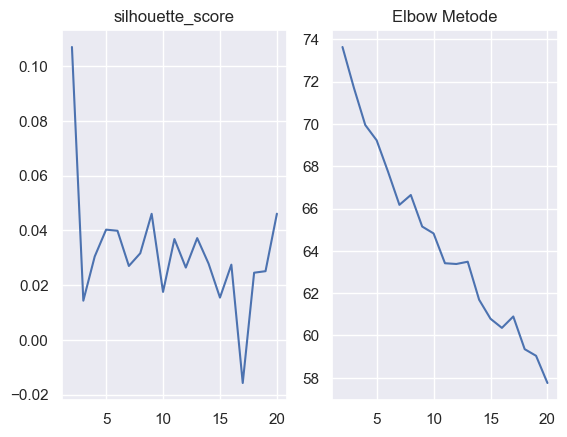

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(2,kmax+1),sil)
ax2.plot(potential_k, result)
ax1.set_title('silhouette_score')
ax2.set_title('Elbow Metode')
plt.show()

In [91]:
optimal_k_sil = sil.index(max(sil))+2

In [92]:
print(f"optimal K using elbow : {optimal_k_elbow}")
print(f"optimal K using silh : {optimal_k_sil}")

optimal K using elbow : 4
optimal K using silh : 2


# Modeling

train the model with the optimal_k value 

In [93]:
kmeans_sil = KMeans(n_clusters=optimal_k_sil)
y_kmeans_sil = kmeans_sil.fit_predict(data_numeric_standarized)
centers_sil = kmeans_sil.cluster_centers_
#---#
kmeans_elbow = KMeans(n_clusters=optimal_k_elbow)
y_kmeans_elbow = kmeans_elbow.fit_predict(data_numeric_standarized)
centers_elbow = kmeans_elbow.cluster_centers_

# Evaluating

use PCA to reduce the dimentions of the data to plot it in 2d space

In [94]:
pca_model = PCA(n_components = 2)
pca_model.fit(data_numeric_standarized)

PCA(n_components=2)

In [95]:

training_data_pca = pca_model.transform(data_numeric_standarized)
centers_elbow_pca = pca_model.transform(centers_elbow)
centers_sil_pca = pca_model.transform(centers_sil)

c:\Users\nasser\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\nasser\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


draw the data in 2d space

Text(0.5, 1.0, 'kmeans approuch')

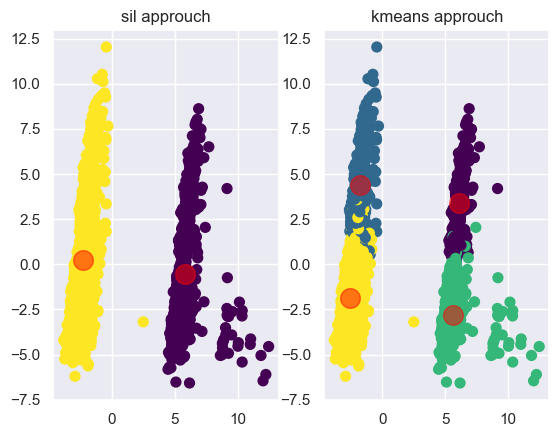

In [96]:

figure, axis = plt.subplots(1, 2)
axis[0].scatter(training_data_pca[:, 0],
            training_data_pca[:, 1], c=y_kmeans_sil, s=50, cmap='viridis')
axis[0].scatter(centers_sil_pca[:, 0], centers_sil_pca[:, 1], c='red', s=200, alpha=0.5)
axis[1].scatter(training_data_pca[:, 0],
            training_data_pca[:, 1], c=y_kmeans_elbow, s=50, cmap='viridis')
axis[1].scatter(centers_elbow_pca[:, 0], centers_elbow_pca[:, 1], c='red', s=200, alpha=0.5)

axis[0].set_title("sil approuch")
axis[1].set_title("kmeans approuch")

In [97]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric_standarized)
training_data_embedding = umap_model.transform(data_numeric_standarized)
centers_sil_embedding = umap_model.transform(centers_sil)
centers_elbow_embedding = umap_model.transform(centers_elbow)

c:\Users\nasser\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 1.0, 'kmeans approuch')

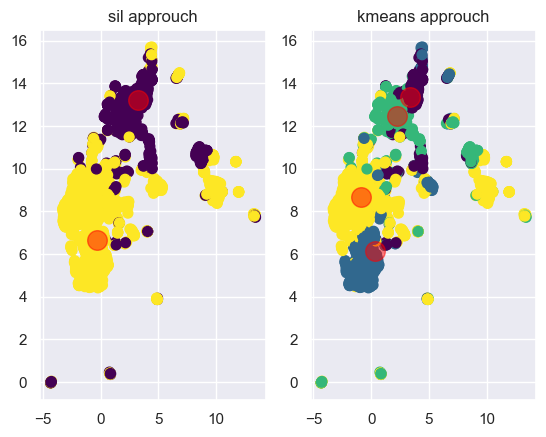

In [98]:

figure, axis = plt.subplots(1, 2)
axis[0].scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=y_kmeans_sil, s=50, cmap='viridis')
axis[0].scatter(centers_sil_embedding[:, 0], centers_sil_embedding[:, 1], c='red', s=200, alpha=0.5)
axis[1].scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=y_kmeans_elbow, s=50, cmap='viridis')
axis[1].scatter(centers_elbow_embedding[:, 0], centers_elbow_embedding[:, 1], c='red', s=200, alpha=0.5)

axis[0].set_title("sil approuch")
axis[1].set_title("kmeans approuch")

For n_clusters = 2 The average silhouette_score is : 0.10699894735737715
For n_clusters = 3 The average silhouette_score is : 0.016077760360937516
For n_clusters = 4 The average silhouette_score is : 0.026399084379029665
For n_clusters = 5 The average silhouette_score is : 0.014612477342402213
For n_clusters = 6 The average silhouette_score is : 0.03380748953054124
For n_clusters = 7 The average silhouette_score is : 0.037404038448046066
For n_clusters = 8 The average silhouette_score is : 0.010860413418000847
For n_clusters = 9 The average silhouette_score is : 0.02564079597078395


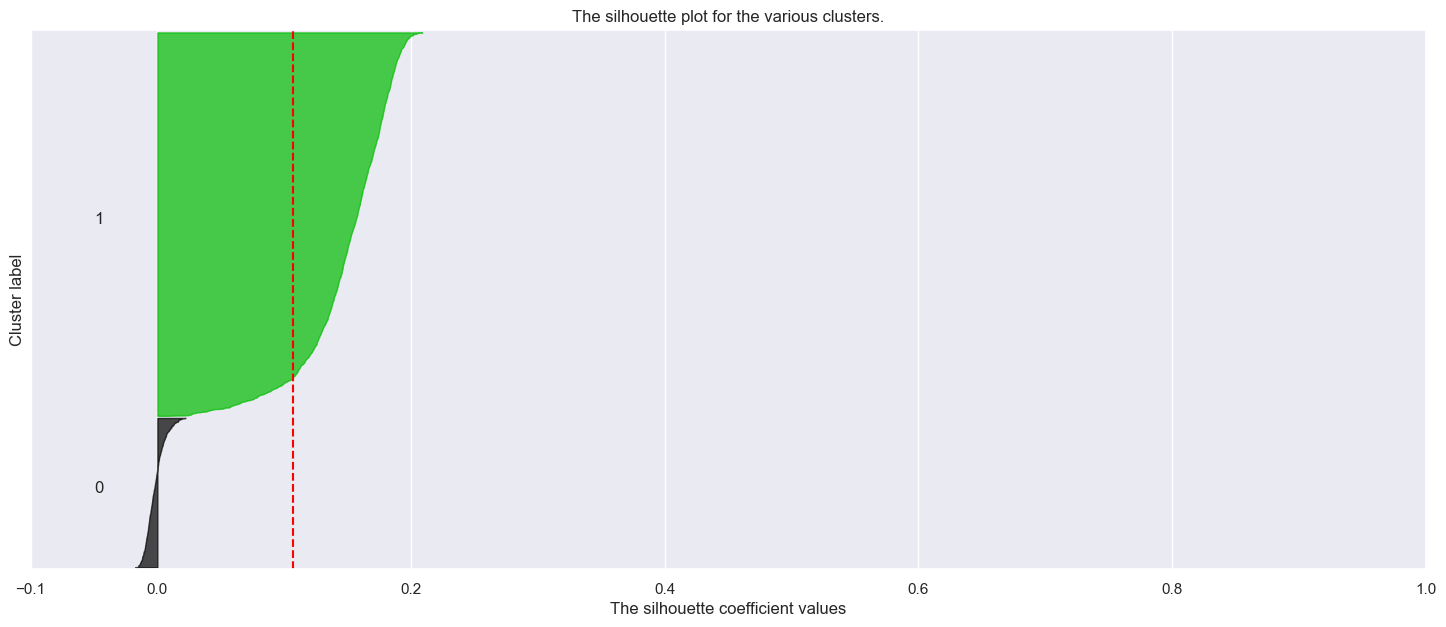

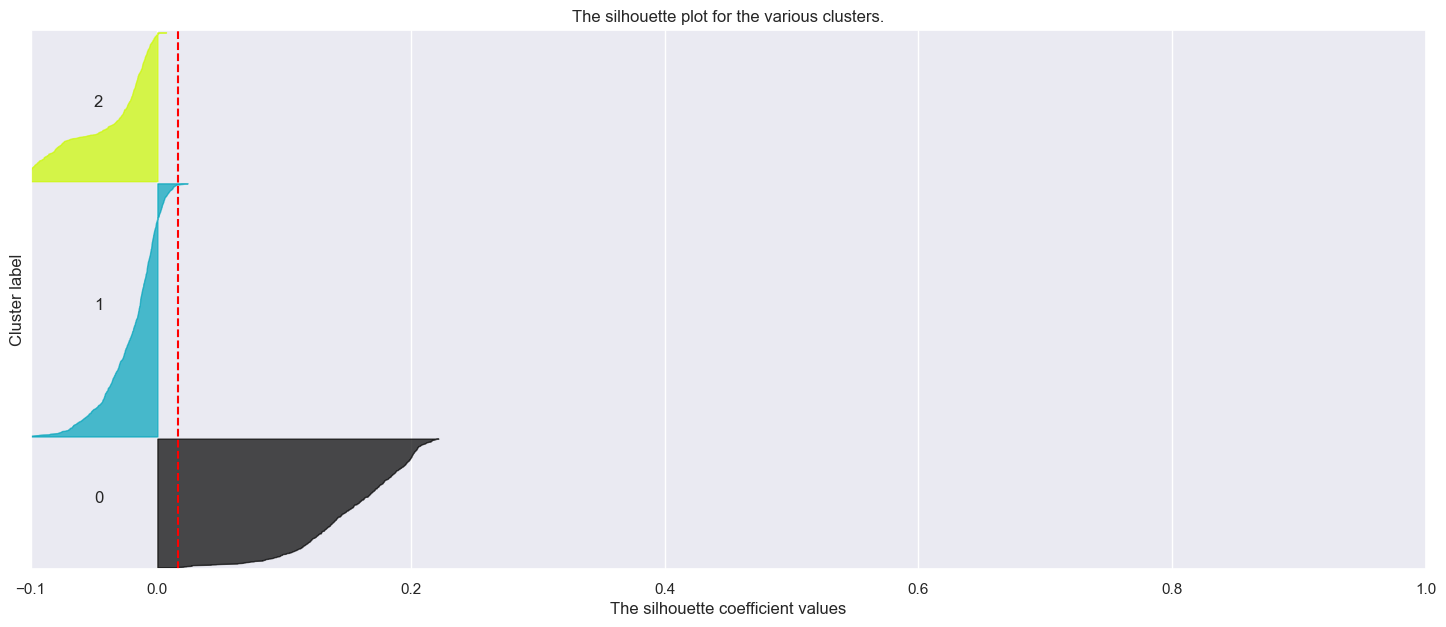

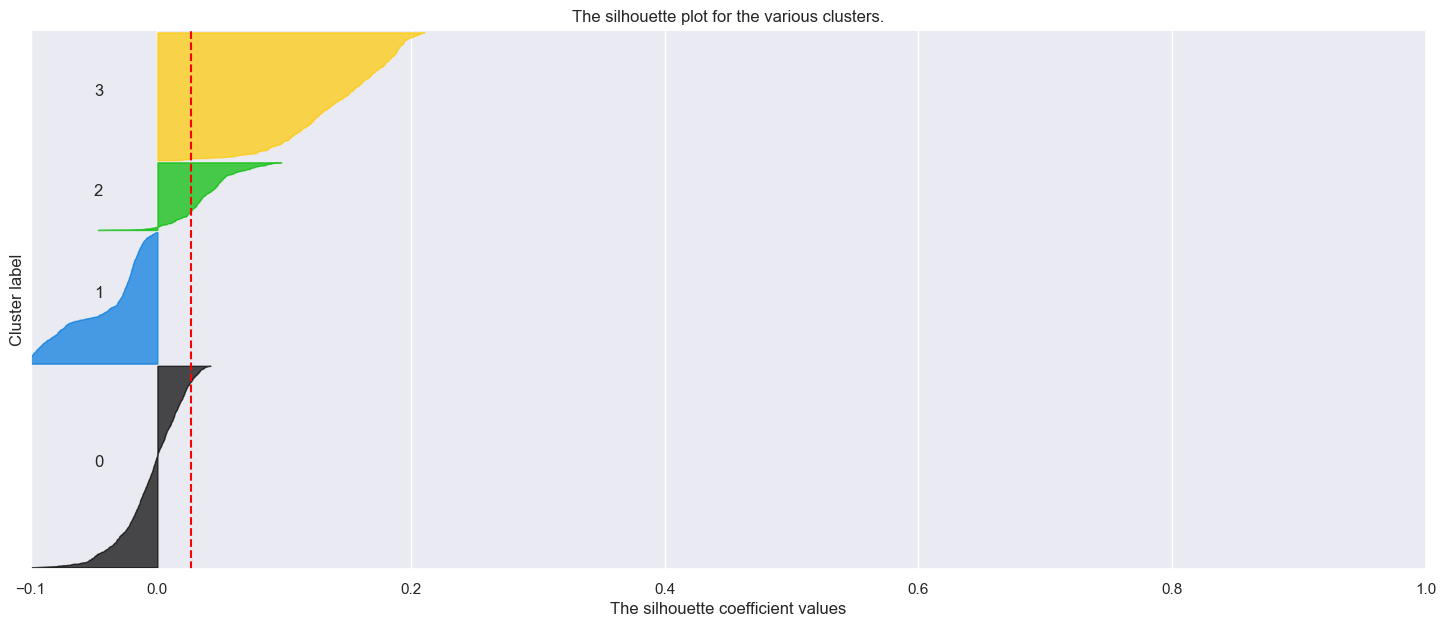

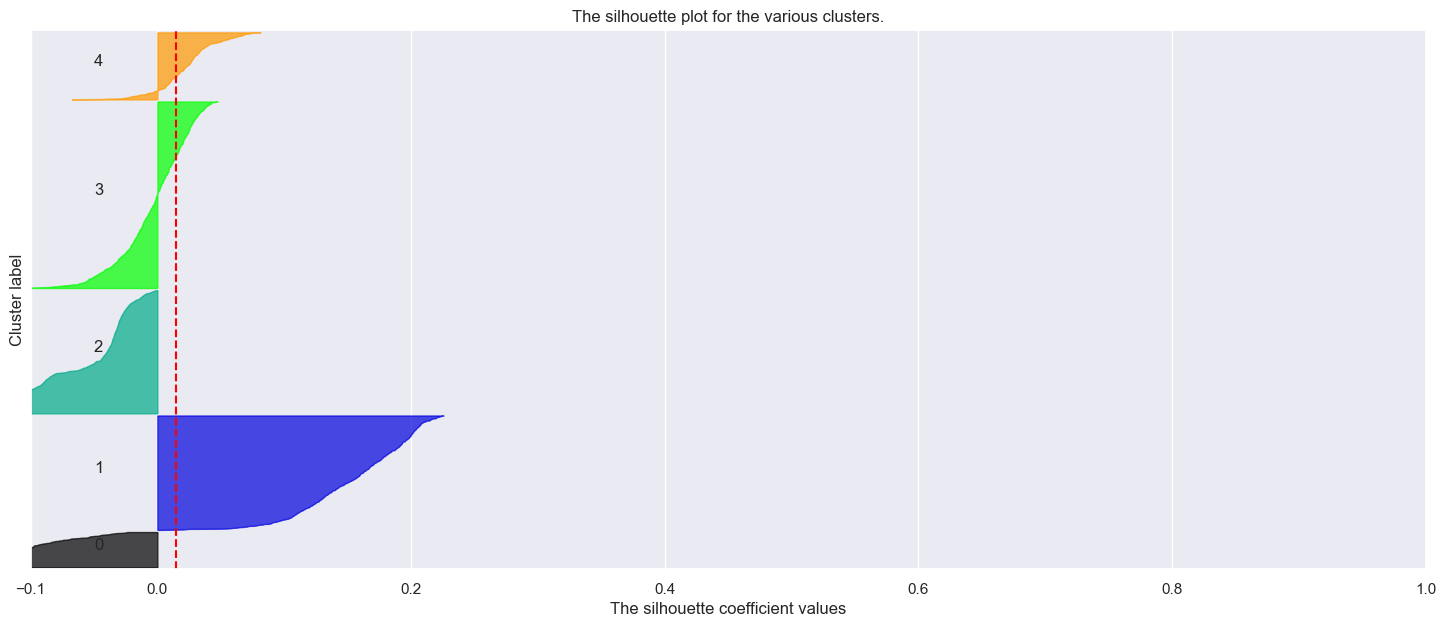

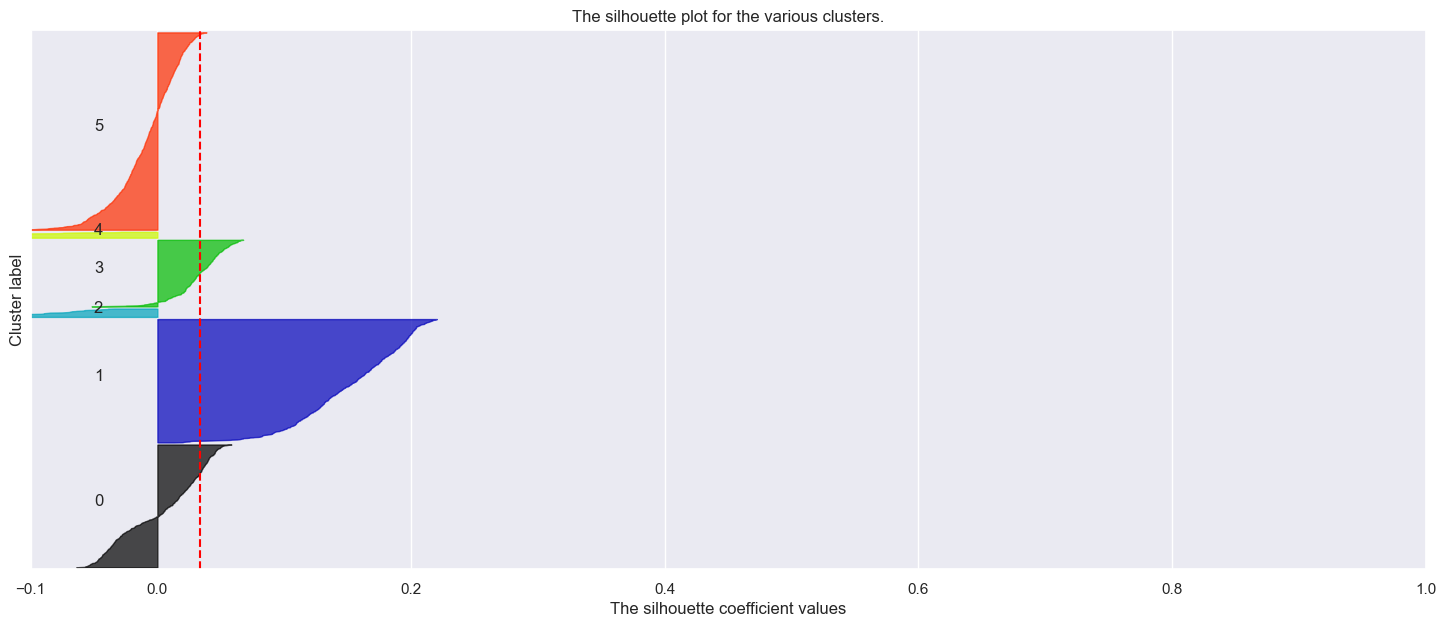

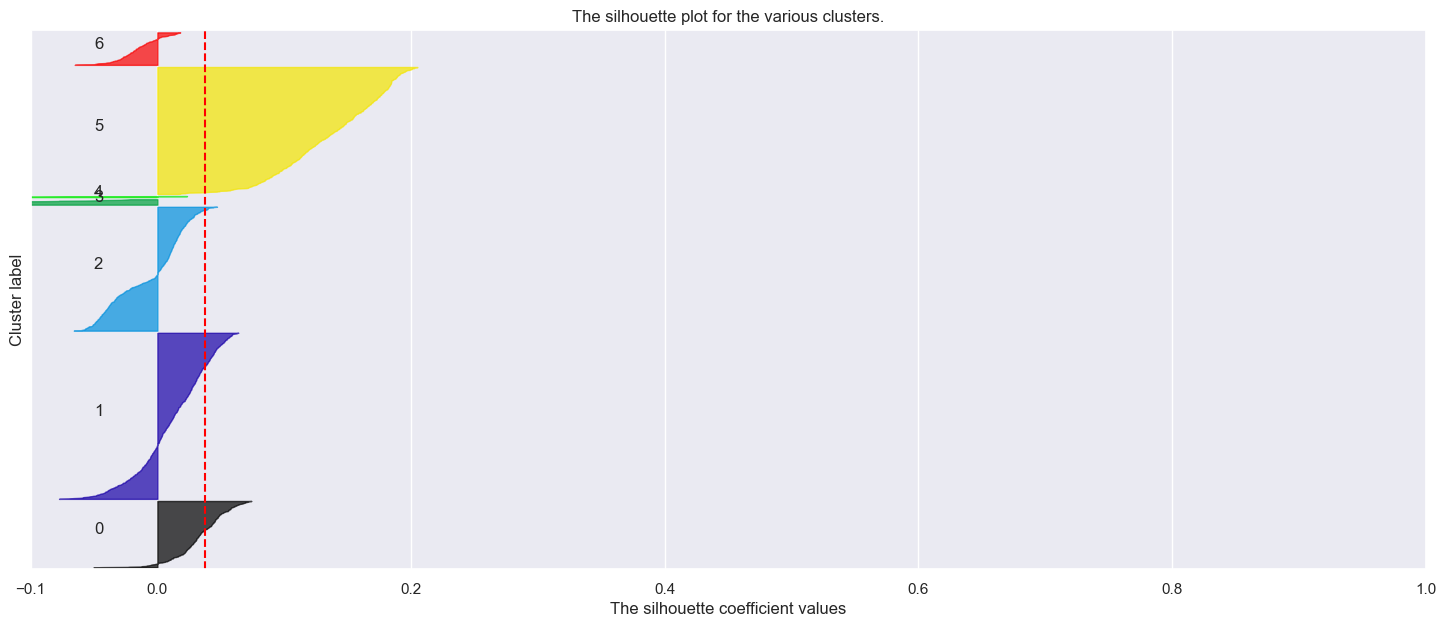

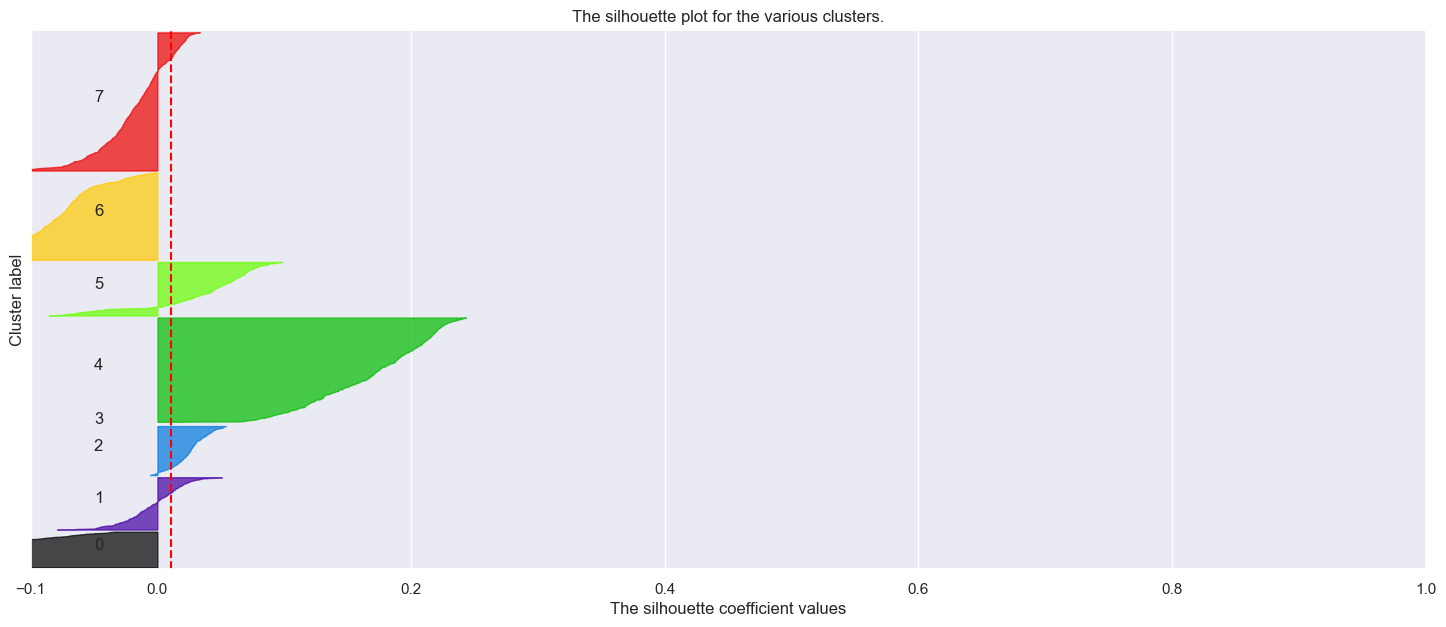

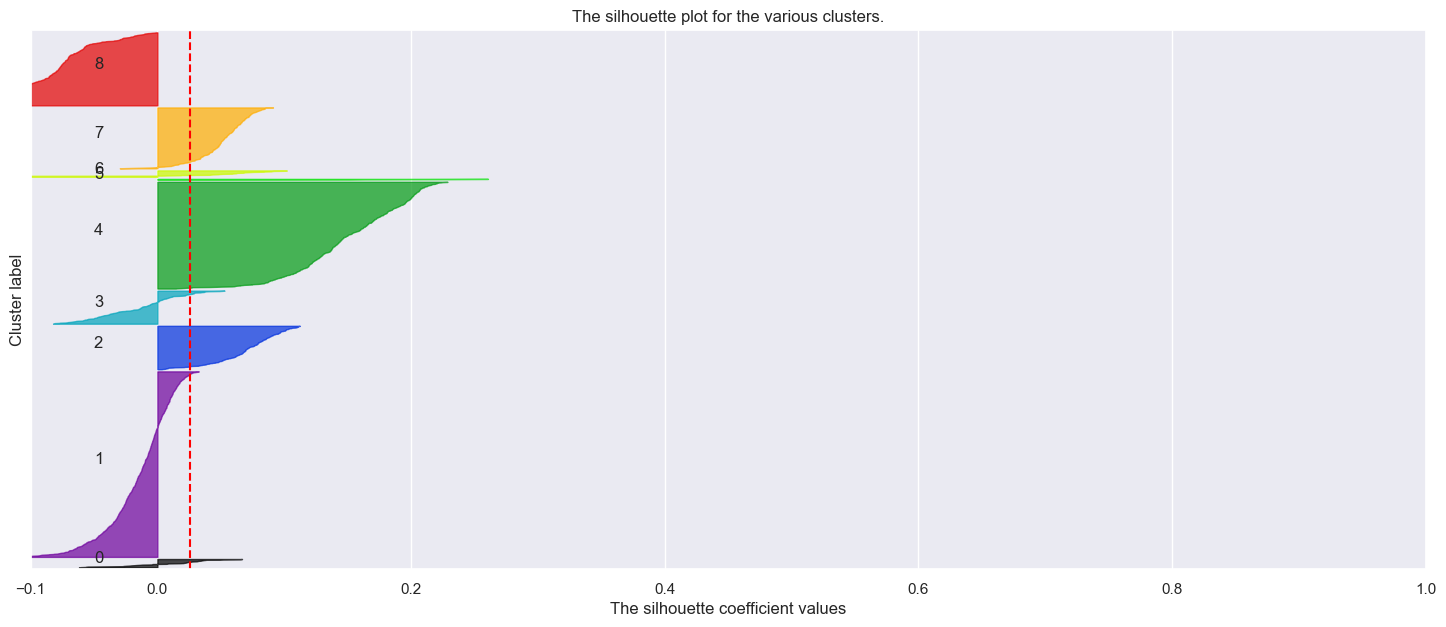

In [99]:
import matplotlib.cm as cm
potential_k = list(range(2, 10))
for n_clusters in potential_k:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_numeric_standarized) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_numeric_standarized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_numeric_standarized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_numeric_standarized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# K-Means Analysis

In [100]:
data_numeric_mohammad = data_numeric.copy()
data_numeric_mohammad['label'] = y_kmeans_elbow

# label 0

In [101]:
variances = data_numeric_mohammad.var()
zero_variances = variances[variances == 0].index
data_numeric_mohammad = data_numeric_mohammad.drop(zero_variances, axis=1)

In [102]:
label_0_data = data_numeric_mohammad[data_numeric_mohammad['label']==0]

In [103]:
label_0_data.to_csv("data/kmeans_label_0.csv")

In [104]:
label_0_variance = data_numeric_mohammad[data_numeric_mohammad['label']==0].var().sort_values()
count = 0
for i in label_0_variance[label_0_variance==0].index:
    print(f"{i}          ",end="")
    count +=1
    if count %10:
        count = 0
        print()

    

school_bike_park_skip logic          
school_mode_auto_skip logic          
school_mode_bus_Express bus          
school_mode_bus_Other private          
school_mode_bus_School bus          
school_mode_rail_Commuter rail          
school_mode_rail_Other rail           
school_mode_rail_PATH train          
school_mode_auto_Other vehicle          
school_mode_ferry_Staten Island Ferry          
school_mode_bike_Citi Bike          
school_mode_bike_Standard bicycle owned by my household          
school_mode_bike_skip logic          
school_bike_park_Bike rack          
school_bike_park_Secured bike room          
no_bike_nyc_bike_lanes_Not selected          
no_bike_nyc_bike_lanes_Selected          
school_mode_ferry_skip logic          
school_mode_auto_Carpool          
school_mode_auto_Car from work          
work_bike_park_skip logic          
work_mode_rail_Other rail          
work_mode_rail_PATH train          
work_mode_ferry_NYC Ferry          
work_mode_ferry_Staten Island Fe

In [105]:
label_0_data.shape

(275, 288)

In [106]:
column_name = "worker_Employed"
print(label_0_data[label_0_data[column_name]==1][column_name])
print(label_0_data[label_0_data[column_name]==1][column_name].count()/label_0_data.shape[0])

848     1
1168    1
1251    1
2436    1
2910    1
3694    1
4308    1
5200    1
5644    1
5857    1
6297    1
6315    1
6571    1
6611    1
6662    1
6716    1
6866    1
7047    1
7116    1
7120    1
7161    1
7171    1
7201    1
7347    1
7371    1
7378    1
7396    1
7809    1
8038    1
8181    1
Name: worker_Employed, dtype: uint8
0.10909090909090909


* 99% of them do the servey from the mobile app ()
* almost all the peapole in this cluster not in the age 18_24 -> adults 
* 80% are employment full time
* 0% not employed -> more power to the adults point
* 100% are workers with diffrenet types of work
* the majority not a students
* 0% a car share vehicle 
* 99% of them have a 1 or 2 or 3 private cars (vehicle)
* 100% of them go to work with private vehicle (work_mode_In a household vehicle)
* 60% of them use parking to park there cars and the 40% others use street
* 70% dont pay parking fee 
* all of them dont use bus or rail or any other ways of transportaion just private vihacle to go to work (work_mode_bus_skip logic)
* 50% of them are girls and 50% are mens theres a even split in gender
* 50% of them are whites and the 50% other distributed on different races

In [108]:
column_name = "bike_num_days"
label_0_data[column_name]

2       2
28      8
52      8
118     0
242     0
       ..
8195    0
8213    8
8221    8
8247    8
8268    8
Name: bike_num_days, Length: 275, dtype: int64

In [109]:
label_1_data = data_numeric_mohammad[data_numeric_mohammad['label']==1]
label_1_data.to_csv("data/kmeans_label_1.csv")

In [110]:
label_1_data.shape

(650, 288)

In [111]:
column_name = "disability_walking_Selected"
print(label_1_data[label_1_data[column_name]==1][column_name].count()/label_1_data.shape[0])
print(label_1_data[label_1_data[column_name]==1][column_name])

0.15846153846153846
92      1
99      1
511     1
541     1
1189    1
       ..
8124    1
8144    1
8176    1
8199    1
8255    1
Name: disability_walking_Selected, Length: 103, dtype: uint8


* 50% of them do the servey from the mobile app and the rest from the browser or call centers
* most of the people in this cluster are in age between 35 - 60 ("age_35-44","age_75-84","age_55-64","age_45-54)
* 95% of the people not currently employeed (employment_Not currently employed,worker_Not employed)
* most of them are not students (student_Not a student)
* more than half of them dont have vehicle 
* 60% of them females , 40% males (gender_Female,gender_Male)
* 25% of them are black (race_Balck_Selected)
* 50% of them are White(race_white_Selected)
* 15% of them have walking disability (disability_hearing_Selected)  and theres a 20% additional people have other disabilities

In [112]:
label_2_data = data_numeric_mohammad[data_numeric_mohammad['label']==2]
label_2_data.to_csv("data/kmeans_label_2.csv")

In [113]:
label_2_data.shape

(480, 288)

In [114]:
column_name = "disability_dressing_Selected"
print(label_2_data[label_2_data[column_name]==1][column_name].count()/label_2_data.shape[0])
print(label_2_data[label_2_data[column_name]==1][column_name])

0.0020833333333333333
5454    1
Name: disability_dressing_Selected, dtype: uint8


* 60% of them have Iphone  (smartphone_type ==2)
* people age are distibuted evenly between 24 - 74  (also adults)
* 75% are a full time employees 15% are part time and the rest are others 
* 100% of them are employees (worker_Employed)
* not a students
* 28% of them have a private vehicle
* 15% go to work using bus or shuttle
* 60% go to work using rail
* 60% females and 40% males
* 50% of them are white and 18% are black
* 60% of them use subways


In [115]:
label_3_data = data_numeric_mohammad[data_numeric_mohammad['label']==3]
label_3_data.to_csv("data/kmeans_label_3.csv")

In [116]:
label_3_data.shape

(1287, 288)

In [117]:
column_name = "race_white_Selected"
print(label_3_data[label_3_data[column_name]==1][column_name].count()/label_3_data.shape[0])
print(label_3_data[label_3_data[column_name]==1][column_name])

0.4763014763014763
6       1
15      1
18      1
42      1
54      1
       ..
8177    1
8214    1
8270    1
8274    1
8278    1
Name: race_white_Selected, Length: 613, dtype: uint8


* 60% employees 40% are not emplyees 
* 41% have private car
* 30% use reils to go to work
* 50% females , 50% males
* 50% white  15% black

# DBSCAN 
Hyperparamters used: 
* "eps": specifies the maximum distance between two points to be considered neighbors and part of the same cluster
* "min_samples": specifies the minimum number of points required for a group of points to be considered a cluster
* "metric": clustering evaluation metric

Hyper Parameter Tuning

finding the optimal eps, and min_samples using silhouette_score


In [118]:
array_data_numeric_standarized = np.array(data_numeric_standarized)
array_data_numeric_standarized

array([[-0.50733435,  1.42617077, -0.7334785 , ..., -0.35943655,
        -0.34813719, -0.36599336],
       [ 0.87359999, -0.74678558, -1.25432369, ..., -0.35943655,
        -0.34813719, -0.36599336],
       [ 0.87359999, -0.74678558, -1.25432369, ..., -0.35943655,
        -0.34813719, -0.36599336],
       ...,
       [ 2.25453433, -0.74678558,  0.82905708, ..., -0.35943655,
        -0.34813719,  2.73229003],
       [-1.88826868, -0.74678558,  0.82905708, ..., -0.35943655,
        -0.34813719,  2.73229003],
       [-1.88826868, -0.74678558, -1.25432369, ..., -0.35943655,
        -0.34813719,  2.73229003]])

K = 2

In [119]:
# determine the best value for eps with k=2
k=2
neighbor = NearestNeighbors(n_neighbors=k)
neighbors = neighbor.fit(array_data_numeric_standarized)
distances, indices = neighbors.kneighbors(array_data_numeric_standarized)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]

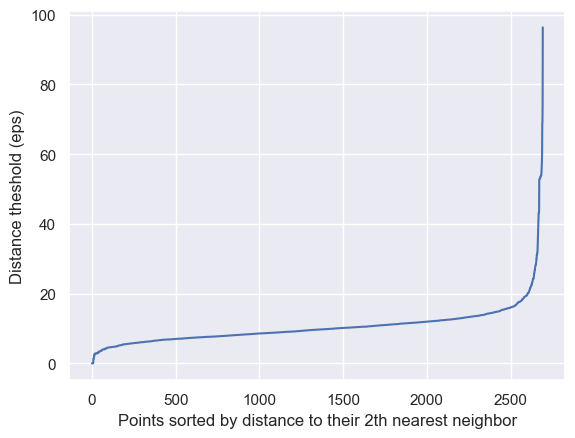

In [120]:
# Plot the sorted distances
plt.plot(distances)
plt.xlabel(f'Points sorted by distance to their {k}th nearest neighbor')
plt.ylabel('Distance theshold (eps)')
plt.show()

the value for Eps = 20 is the optimal using 2th nearest

k=4

In [121]:
# Choose a value for k
k = 4

# Compute the distances to the kth nearest neighbor
nearest_neighbors = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(array_data_numeric_standarized)
distances, indices = nearest_neighbors.kneighbors(array_data_numeric_standarized)
k_distances = np.sort(distances[:, -1])

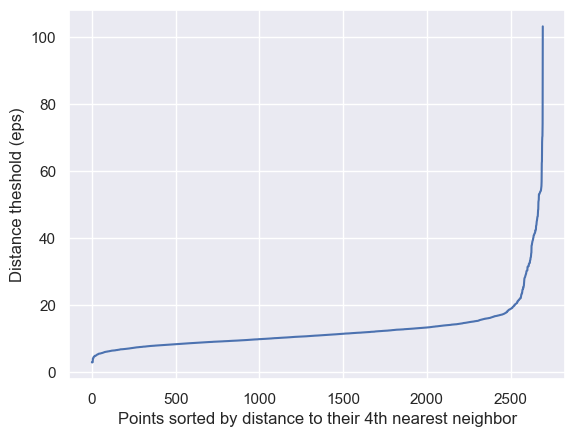

In [122]:
# Plot the sorted distances
plt.plot(k_distances)
plt.xlabel(f'Points sorted by distance to their {k}th nearest neighbor')
plt.ylabel('Distance theshold (eps)')
plt.show()

the value for Eps = 20 is the optimal using 4th nearest

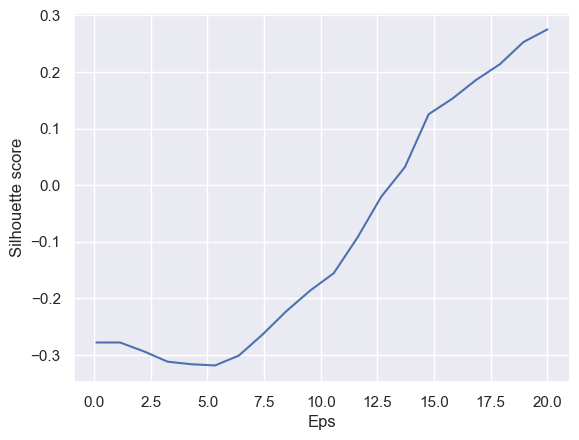

In [ ]:
# Choose a range of 'eps' values to try
eps_range = np.linspace(0.1, 20.0, num=20)

# Evaluate DBSCAN with different values of eps
silhouette_scores = []
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=k)
    dbscan.fit(array_data_numeric_standarized)
    if len(set(dbscan.labels_)) > 1: # check if there is more than one cluster
        silhouette_scores.append((eps, silhouette_score(array_data_numeric_standarized, dbscan.labels_)))

# Plot the silhouette scores for different values of eps
eps, scores = zip(*silhouette_scores)
plt.plot(eps, scores)
plt.xlabel('Eps')
plt.ylabel('Silhouette score')
plt.show()

set range of hyperparameters values to try


Best hyperparameters: eps=50.0, min_samples=3


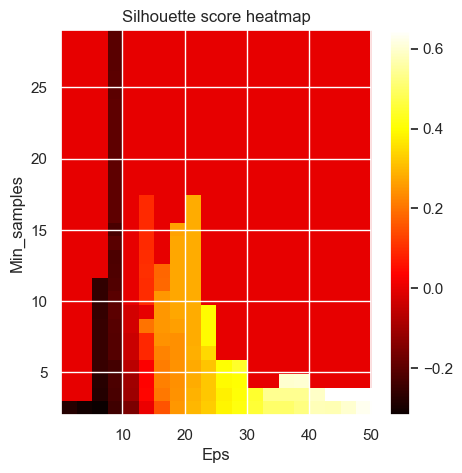

In [ ]:
# set range of hyperparameter values to try
eps_range = np.linspace(0.1, 50.0, num=20)
min_samples_range = np.arange(2, 30)

# initialize array to store silhouette scores
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# loop over hyperparameter values and calculate silhouette scores
for indx_eps, eps in enumerate(eps_range):
    for indx_min_samples, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_numeric_standarized)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette_scores[indx_eps, indx_min_samples] = \
            silhouette_score(data_numeric_standarized, labels, metric = 'euclidean')


# plot silhouette score heatmap
plt.figure(figsize=(5, 5))
plt.title("Silhouette score heatmap")
plt.xlabel("Eps")
plt.ylabel("Min_samples")
plt.imshow(silhouette_scores.T, cmap='hot', interpolation='nearest',
           extent=[eps_range[0], eps_range[-1], 
                   min_samples_range[0], min_samples_range[-1]],
           aspect='auto', origin='lower')
plt.colorbar()

# select best hyperparameters based on evaluation metrics
best_eps_idx, best_min_samples_idx = np.unravel_index(
    np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_range[best_eps_idx]
best_min_samples = min_samples_range[best_min_samples_idx]
print(f"Best hyperparameters: eps={best_eps}, min_samples={best_min_samples}")

Create DBSCAN object with resulted best hyperparameters and observe its silhouette score


In [ ]:
# Create DBSCAN object with resulted best hyperparameters
dbscan = DBSCAN(eps=best_eps, metric='euclidean', 
                min_samples=best_min_samples)

# Fit model and predict clusters
labels = dbscan.fit_predict(data_numeric_standarized)

# retrieve unique clusters
unique_labels = set(labels)
# get number of unique clusters
no_clusters = len(unique_labels)
# get number of noise
no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'unique_labels = {unique_labels}')
print(f'Number of clusters in DBSCAN = {no_clusters}')
print(f'Number of noise in DBSCAN = {no_noise}')

# Compute silhouette score
silhouette_avg = silhouette_score(data_numeric_standarized, labels)

# Print silhouette score
print("The average silhouette score for DBSCAN with eps=50 and min_samples=1 is:", silhouette_avg)

unique_labels = {0, 1, -1}
Number of clusters in DBSCAN = 3
Number of noise in DBSCAN = 24
The average silhouette score for DBSCAN with eps=50 and min_samples=1 is: 0.6462646085511844


In [ ]:
# Extract the cluster centers
unique_labels = set(labels)
cluster_centers = []
for label in unique_labels:
    if label != -1:
        cluster_centers.append(data_numeric_standarized[labels == label].mean(axis=0))

# Print the number of clusters and their centers
n_clusters = len(cluster_centers)
print(f"Number of clusters found: {n_clusters}\n")
print("Cluster centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}:")
    print(f"{center}\n\n")

Number of clusters found: 2

Cluster centers:
Cluster 1:
smartphone_type               -0.003151
jobs_count                     0.003775
bike_num_days                  0.000582
survey_mode_Call center        0.000973
survey_mode_rMove              0.000383
                                 ...   
cms_zone_Northern Manhattan   -0.002291
cms_zone_Outer Brooklyn        0.003383
cms_zone_Outer Queens         -0.001074
cms_zone_Southern Bronx       -0.000098
cms_zone_Staten Island        -0.002105
Length: 295, dtype: float64


Cluster 2:
smartphone_type                0.413289
jobs_count                    -0.690243
bike_num_days                 -1.178846
survey_mode_Call center       -0.252213
survey_mode_rMove              0.679305
                                 ...   
cms_zone_Northern Manhattan   -0.304920
cms_zone_Outer Brooklyn       -0.333883
cms_zone_Outer Queens         -0.359437
cms_zone_Southern Bronx        0.725385
cms_zone_Staten Island        -0.365993
Length: 295, dtype: fl

# PCA

In [ ]:
pca_model2 = PCA(n_components = 2)
pca_model2.fit(data_numeric_standarized)

PCA(n_components=2)

In [ ]:
training_data_pca2 = pca_model2.transform(data_numeric_standarized)
centers_pca2 = pca_model2.transform(cluster_centers)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
(training_data_pca2).shape

(2692, 2)

In [ ]:
centers_pca2

array([[-0.03400393,  0.01315647],
       [12.35792385, -5.66669209]])

In [ ]:
pca_dataframe = pd.DataFrame(data=training_data_pca2,
                             columns=['pca1','pca2'])
pca_dataframe

,pca1,pca2
0,6.596378,1.914396
1,-2.768532,-3.342302
2,-2.759204,-1.359445
3,12.153620,-6.432407
4,-2.548359,-1.348018
...,...,...
2687,-2.507525,0.380463
2688,-2.727526,-2.845784
2689,-2.242223,-0.579256
2690,-2.416057,-2.176433


In [ ]:
pca_df = pd.concat([pca_dataframe, pd.DataFrame({'cluster': labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,6.596378,1.914396,0
1,-2.768532,-3.342302,0
2,-2.759204,-1.359445,0
3,12.153620,-6.432407,1
4,-2.548359,-1.348018,0
...,...,...,...
2687,-2.507525,0.380463,0
2688,-2.727526,-2.845784,0
2689,-2.242223,-0.579256,0
2690,-2.416057,-2.176433,0


In [ ]:
unique_vals, counts = np.unique(labels, return_counts=True)

In [ ]:
for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")

-1: 24
0: 2665
1: 3


* We have 24 sample of noise data

* Almost all the data included in cluster0

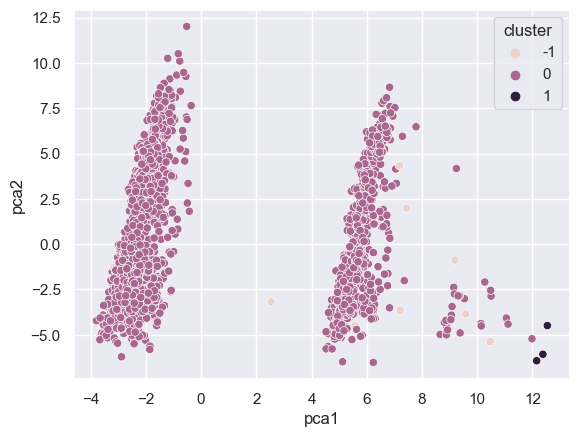

In [ ]:
ax= sns.scatterplot(x="pca1", y="pca2", hue="cluster",data=pca_df, )
plt.show()

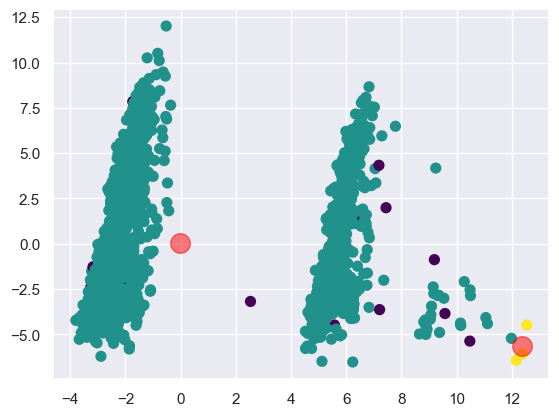

In [ ]:
plt.scatter(training_data_pca2[:, 0],
            training_data_pca2[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_pca2[:, 0], centers_pca2[:, 1], c='red', s=200, alpha=0.5)

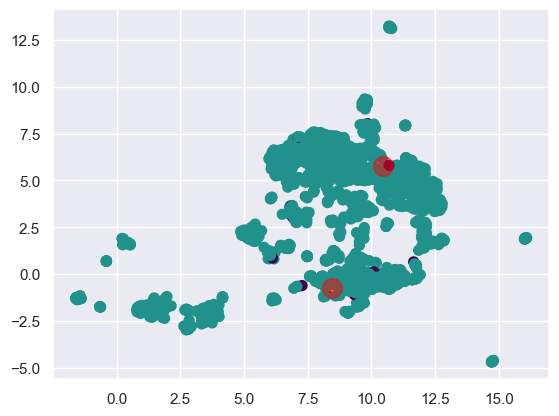

In [ ]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric_standarized)
training_data_embedding = umap_model.transform(data_numeric_standarized)
centers_embedding = umap_model.transform(cluster_centers)

# plot the data in the low dim with the cluster results
plt.scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_embedding[:, 0], centers_embedding[:, 1], c='red', s=200, alpha=0.5)
plt.show(block=True)

#### Try DBSCAN without scaling data

##### Hyper Parameter Tuning

Determine the optimal 'eps' parameter value by performing different 'k' for KNN

In [ ]:
# transform dataframe into an array to include it as a parameter for KNN
array_data_numeric = np.array(data_numeric)
array_data_numeric

array([[  1., 995.,   2., ...,   0.,   0.,   0.],
       [  2.,   1.,   0., ...,   0.,   0.,   0.],
       [  2.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [  3.,   1., 995., ...,   0.,   0.,   1.],
       [  0.,   1., 995., ...,   0.,   0.,   1.],
       [  0.,   1.,   0., ...,   0.,   0.,   1.]])

In [ ]:
# Define the number of rows and columns in the subplot grid
num_rows, num_cols = 3, 3

# Create a figure with subplots
fig = make_subplots(rows=num_rows, cols=num_cols)

# Define the range of k values to try
k_range = np.arange(2, 9)

for counter, k_knn in enumerate(k_range):
    row = counter // num_cols + 1
    col = counter % num_cols + 1

    # Compute the distances to the kth nearest neighbor
    nearest_neighbors = NearestNeighbors(n_neighbors=k_knn).fit(array_data_numeric)
    distances, indices = nearest_neighbors.kneighbors(array_data_numeric)
    k_distances = np.sort(distances[:, -1])

    # Plot the sorted distances
    trace = go.Scatter(y=k_distances, showlegend=False)
    fig.add_trace(trace, row=row, col=col)

    # Add title and axis labels to subplot
    fig.update_xaxes(title_text=f'Points sorted by {k_knn}th nearest neighbor distance',
                     row=row, col=col)
    # Distance theshold (eps)
    fig.update_yaxes(title_text=f'Sorted {k_knn}-NN distance',
                     row=row, col=col, title_font=dict(size=12))

# Update the layout
fig.update_layout(height=1000, width=1200, 
                  title_text="Define the optimal 'eps' parameter value by performing different 'k' for KNN",
                  margin=dict(l=50, r=50, t=100, b=60))

# Display the figure
fig.show()

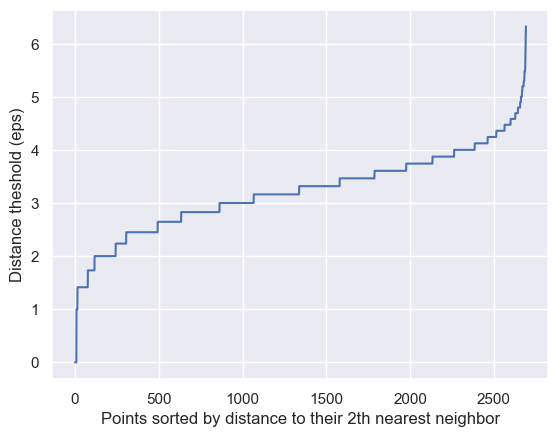

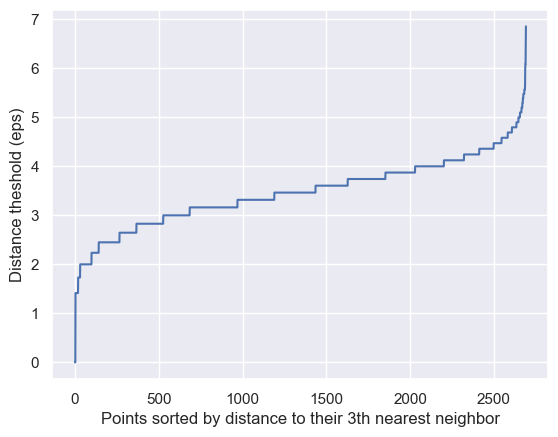

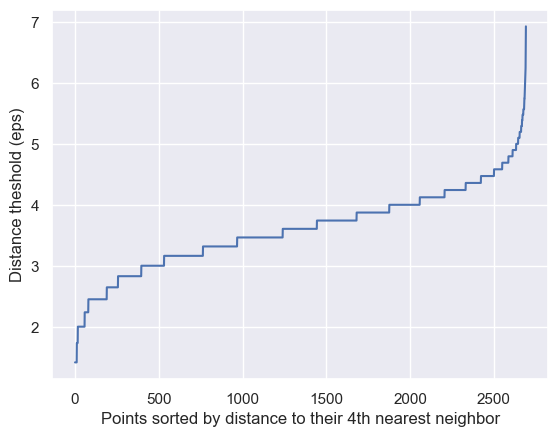

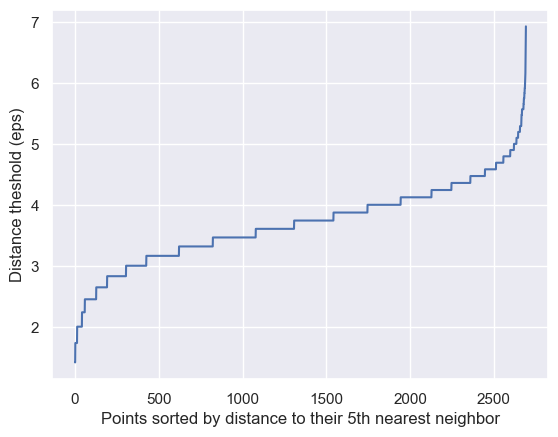

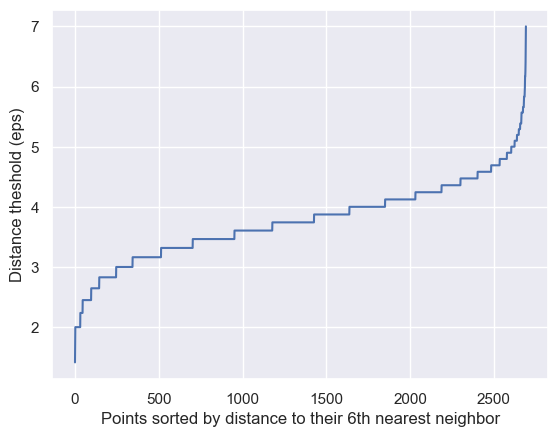

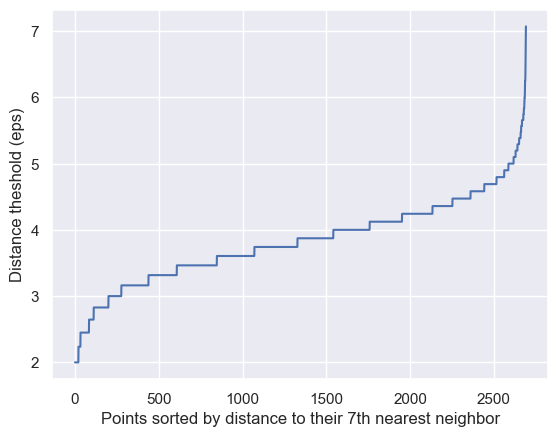

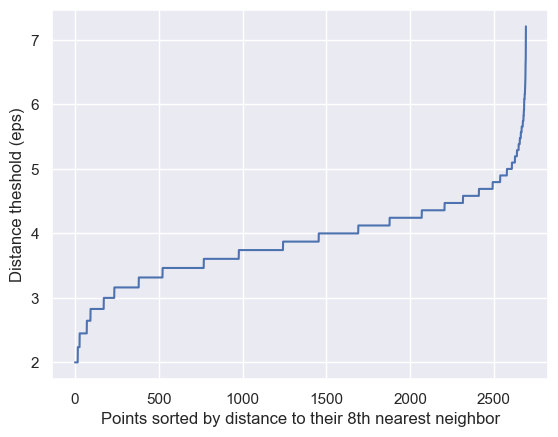

In [ ]:
#  Determine the optimal 'eps' parameter by performing KNN trying multiple values for k
k_range = np.arange(2, 9)

for k in k_range:
    # Compute the distances to the kth nearest neighbor
    nearest_neighbors = NearestNeighbors(n_neighbors=k).fit(array_data_numeric)
    distances2, indices = nearest_neighbors.kneighbors(array_data_numeric)
    k_distances = np.sort(distances2[:, -1])

    # Plot the sorted distances
    plt.plot(k_distances)
    plt.xlabel(f'Points sorted by distance to their {k}th nearest neighbor')
    plt.ylabel('Distance theshold (eps)')
    plt.show()

Best hyperparameters: eps=6.394736842105263, min_samples=2


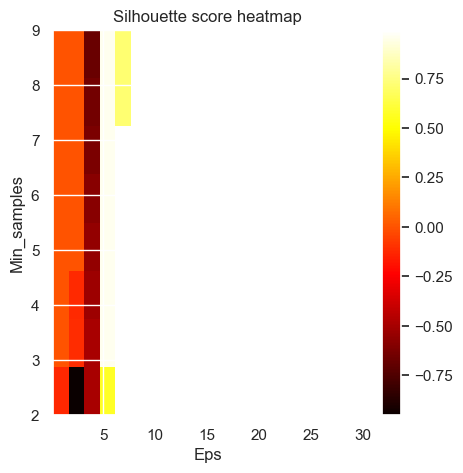

In [ ]:
# set range of hyperparameter values to try
eps_range = np.linspace(0.1, 30.0, num=20)
min_samples_range = np.arange(2, 10)

# initialize array to store silhouette scores
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# loop over hyperparameter values and calculate silhouette scores
for indx_eps, eps in enumerate(eps_range):
    for indx_min_samples, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_numeric)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette_scores[indx_eps, indx_min_samples] = \
            silhouette_score(data_numeric, labels, metric = 'euclidean')


# plot silhouette score heatmap
plt.figure(figsize=(5, 5))
plt.title("Silhouette score heatmap")
plt.xlabel("Eps")
plt.ylabel("Min_samples")
plt.imshow(silhouette_scores.T, cmap='hot', interpolation='nearest',
           extent=[eps_range[0], eps_range[-1], 
                   min_samples_range[0], min_samples_range[-1]],
           aspect='auto', origin='lower')
plt.colorbar()

# select best hyperparameters based on evaluation metrics
best_eps_idx, best_min_samples_idx = np.unravel_index(
    np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_range[best_eps_idx]
best_min_samples = min_samples_range[best_min_samples_idx]
print(f"Best hyperparameters: eps={best_eps}, min_samples={best_min_samples}")

##### Create DBSCAN Object from Best hyperparameters

In [ ]:
# Create DBSCAN object
dbscan = DBSCAN(eps=best_eps, metric='euclidean', 
                min_samples=best_min_samples)

# Fit model and predict clusters
labels = dbscan.fit_predict(data_numeric)

# retrieve unique clusters
unique_labels = set(labels)
# get number of unique clusters
no_clusters = len(unique_labels)
# get number of noise
no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'unique_labels = {unique_labels}')
print(f'Number of clusters in DBSCAN = {no_clusters}')
print(f'Number of noise in DBSCAN = {no_noise}')

# Compute silhouette score
silhouette_avg = silhouette_score(data_numeric, labels)

# Print silhouette score
print(f'The average silhouette score for DBSCAN with eps={best_eps} and min_samples={best_min_samples} is:', silhouette_avg)

unique_labels = {0, 1, 2, 3}
Number of clusters in DBSCAN = 4
Number of noise in DBSCAN = 0
The average silhouette score for DBSCAN with eps=6.394736842105263 and min_samples=2 is: 0.9941364992523383


#### Plot frequency of each cluster

In [ ]:
# Create a copy of the cleaned, scaled dataframe
data_clustered_labeled = data_numeric.copy()

# add clusters labels as new column 
data_clustered_labeled["labels"] = labels

# Plot frequency of each cluster
make_count_plot(data_clustered_labeled)

In [ ]:
# Extract the cluster centers
unique_labels = set(labels)
cluster_centers = []
for label in unique_labels:
    if label != -1:
        cluster_centers.append(data_numeric[labels == label].mean(axis=0))

# Print the number of clusters and their centers
n_clusters = len(cluster_centers)
print(f"Number of clusters found: {n_clusters}\n")
print("Cluster centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}:")
    print(f"{center}\n\n")

Number of clusters found: 4

Cluster centers:
Cluster 1:
smartphone_type                  1.341538
jobs_count                     995.000000
bike_num_days                    0.335385
survey_mode_Call center          0.046154
survey_mode_rMove                0.784615
                                  ...    
cms_zone_Northern Manhattan      0.052308
cms_zone_Outer Brooklyn          0.073846
cms_zone_Outer Queens            0.153846
cms_zone_Southern Bronx          0.132308
cms_zone_Staten Island           0.129231
Length: 295, dtype: float64


Cluster 2:
smartphone_type                1.571788
jobs_count                     1.211587
bike_num_days                  0.343829
survey_mode_Call center        0.008816
survey_mode_rMove              0.794710
                                 ...   
cms_zone_Northern Manhattan    0.090680
cms_zone_Outer Brooklyn        0.105793
cms_zone_Outer Queens          0.117128
cms_zone_Southern Bronx        0.089421
cms_zone_Staten Island         0.117128


## PCA

In [ ]:
pca_model2 = PCA(n_components = 2)
pca_model2.fit(data_numeric)

PCA(n_components=2)

In [ ]:
training_data_pca2 = pca_model2.transform(data_numeric)
centers_pca2 = pca_model2.transform(cluster_centers)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [ ]:
(training_data_pca2).shape

(2692, 2)

In [ ]:
centers_pca2

array([[ 264.64175762,  849.23465455],
       [ 660.7521229 ,  -62.20306423],
       [-251.45857184, -458.70432776],
       [-647.59378971,  452.76874377]])

In [ ]:
pca_dataframe = pd.DataFrame(data=training_data_pca2,
                             columns=['pca1','pca2'])
pca_dataframe

,pca1,pca2
0,263.116649,848.572194
1,661.151315,-62.261243
2,661.150464,-62.260849
3,656.568010,-64.252272
4,-251.789975,-457.942630
...,...,...
2687,-251.393194,-458.857566
2688,-251.391922,-458.858694
2689,-251.391316,-458.859929
2690,-251.391673,-458.861342


In [ ]:
pca_df = pd.concat([pca_dataframe, pd.DataFrame({'cluster': labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,263.116649,848.572194,0
1,661.151315,-62.261243,1
2,661.150464,-62.260849,1
3,656.568010,-64.252272,1
4,-251.789975,-457.942630,2
...,...,...,...
2687,-251.393194,-458.857566,2
2688,-251.391922,-458.858694,2
2689,-251.391316,-458.859929,2
2690,-251.391673,-458.861342,2


d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



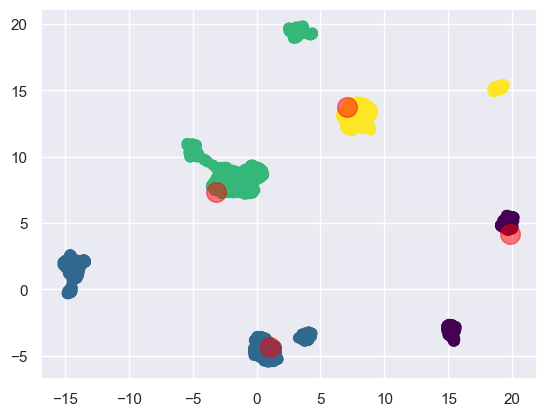

In [ ]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric)
training_data_embedding = umap_model.transform(data_numeric)
centers_embedding = umap_model.transform(cluster_centers)

# plot the data in the low dim with the cluster results
plt.scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_embedding[:, 0], centers_embedding[:, 1], c='red', s=200, alpha=0.5)
plt.show(block=True)

# DBSCAN Analysis

### Label 0
* 100% Unemployed. All people are unemployed, they may be retired, or looking for work....
* 83% are not students, so most of people are neither employees nor students
* Almost 50% of them are 55 yeas old or older
* 0.3% are 85 years old or older
* 87% of people don't ride a bike the whole week
* 56% have never ridden a bike in one of the five boroughs of New York City in the past 12 months
* 20% prefer not to use a bike cause they prefer using other modes
* 27% people don't use a bikeshare service due to not feeling comfortable biking
* 45% use Smartphone-app Ride Service 
* 38% use Uber Smartphone-app Ride Service 
* 76% have not seen or experienced harassment/violence when traveling
* 10% used Subway Rail before began using smartphone-app ride services
* 12% are Car Share Service Users
* 47% of people consider 'doorstep' as their package delivery location when not at home to receive them
* 20% of people consider 'lobby' as their package delivery location when not at home to receive them
* Harassment has influenced travel behavior of 12% of people by paying more attention to their surroundings and other passengers
* 53% are Females    45% are Males
* 24% have Bachelor's degree - the highest level of education completed 
* 21% the highest level of education they completed from Some college
* 87% their english proficiency is very well
* Almost 67% wouldn't consider themselves to be of Hispanic, Latino, or Spanish origin
* 15% would consider themselves to be of Puerto Rican origin
* 14% from asian race
* 20% from black race
* Almost 47% from white race
* 13% of the population has a walking disability

### Label 1
* Almost 79% The method in which the survey was taken is rMove (smartphone app)
* 61% have a smartphone - Apple iPhone
* Almost 34% have a smartphone - Android phone
* Almost 72% age ranges 25-54
    * 25% are 25-34 years old
    * 25% are 35-44 y/o
    * 22% are 45-54 years old
* 100% are employed
* 73% are full-time employees
* 52% Female   |    44% Male
* 90% their english proficiency is very well
* 85% Has a valid driver's license or learner's permit
* 43% have one vehicle
* 30% Strongly oppose congestion pricing
    * But almost 24% Somewhat support congestion pricing
* Usual work location for 68% of people only one (outside of home, may also telework)
* Almost 85% have one job
* 45% never work online from home the whole week
* Typical mode to work for 42% of people is any rail (e.g., subway, train, light rail)
* 40% used Subway Rail before began using smartphone-app ride services
* Almost 60% have never ridden a bike in one of the five boroughs of New York City in the past 12 months
* 20% have ridden a bike a few times a year in one of the five boroughs of New York City in the past 12 months
* The reason for 24% of people to not ride a bicycle in New York City that they prefer using other modes
* 93% have never used a bikeshare service
* Reason for 25% of people to not use a bikeshare service: Not in their neighborhood
* Reason for 23% of people to not use a bikeshare service: Prefer to use their personal bicycle
* Reason for 30% of people to not use a bikeshare service: Do not feel comfortable biking
* 55% Smartphone-app ride services used: Uber
* 37% Smartphone-app ride services used: Lyft
* 65% are Smartphone-app Ride Service Users
* 30% Less than monthly uses smartphone-app ride services (e.g., Lyft, Uber)
* 26% Most common purpose of trips made using smartphone-app ride services is: to Go Home
* for 23% of people, a taxi or car service was the primary mode used before began using smartphone-app ride services
* 44% of people consider 'doorstep' as their package delivery location when not at home to receive them
* 21% of people consider 'lobby' as their package delivery location when not at home to receive them
* 69% have not seen or experienced harassment/violence when traveling in the past week
* 35% have Bachelor's degree - the highest level of education completed 
* 51% white race

### Label 2
* Almost 72% filled the survey via rMove (smartphone app)
* 52% have a smartphone - Apple iPhone
* Almost 72% age ranges 25-54
    * 25% are 25-34 years old
    * 25% are 35-44 y/o
    * 22% are 45-54 years old
* 100% are employed
    * 74% are full-time employees
    * 89% have only 1 job
    * 72% have only one work location (outside of home, may also telework)
* 39% have one vehicle
* 56% Female    |   41% Male
* 89% their english proficiency is very well
* 92% aren't students
* 47% white race
* 26% use trip planning apps 6-7 days a week
    * 20% use trip planning apps 2-3 days a week

* 66% are Smartphone-app Ride Service Users
* 56% Smartphone-app ride services used: Uber
* 38% Smartphone-app ride services used: Lyft

* 31% Strongly oppose congestion pricing
* Almost 82% have never ridden a bike in one of the five boroughs of New York City in the past 12 months
* 98% have never used a bikeshare service
* 88% have never used a bikeshare service
* Typical mode to work for 53% of people is any rail (e.g., subway, train, light rail)

### Label 3
* 41% filled the survey via rSurvey (online, browser)
    * Almost 38% filled the survey via rMove (smartphone app)
* 31% have a smartphone - Apple iPhone
* 39% do not have a smartphone
* 30% age ranges 65-74
* 17% are 55-64 years old
* 100% All are unemployed
* 88% aren't students
* 61% Female    |   37% Male
* 23% black race
* 48% white race
* 21% have walking disability

* 88% their english proficiency is very well
* 10% car share users
* 35% have one vehicle
* 39% don't have smartphones
* 31%  have iPhone
* 29% have Android phone
* 33% are Smartphone-app Ride Service Users
* 28% Smartphone-app ride services used: Uber

# Hierarchical 

# Hyper Parameter Tuning
finding the optimal k by visiualizing dendrogram


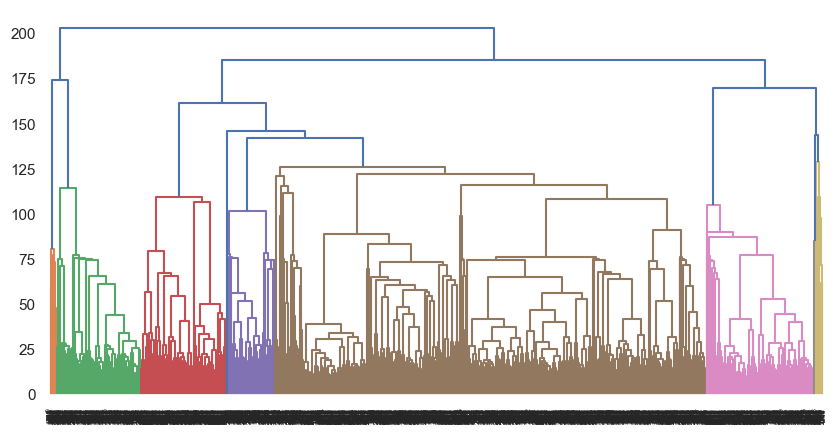

In [ ]:
# Compute distances matrix
Z = linkage(data_numeric_standarized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [ ]:
# Extract clusters based on distance threshold
distance_threshold = 160 # Maximum distance between points in a cluster.
clusters = fcluster(Z, t=distance_threshold, criterion='distance')

In [ ]:
unique_clusters = np.unique(clusters)
unique_clusters

array([1, 2, 3, 4, 5, 6], dtype=int32)

finding the optimal k using silhouette_score


In [ ]:
def silhouette_method(data, K):
    """
    Finds the optimal number of clusters using the silhouette score method for agglomerative clustering.
    
    Args:
        data (numpy array): The data matrix.
        K (tuple): The range of values for k to evaluate.
        
    Returns:
        optimal_k (int): The optimal number of clusters.
        silhouette_scores (list): The silhouette scores for each value of k.
    """
    silhouette_scores = []
    k_values = range(K[0], K[1])
    
    for k in k_values:
        model = AgglomerativeClustering(n_clusters=k)
        labels = model.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)

    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()
    
    optimal_k = k_values[np.argmax(silhouette_scores)]
    return optimal_k, silhouette_scores

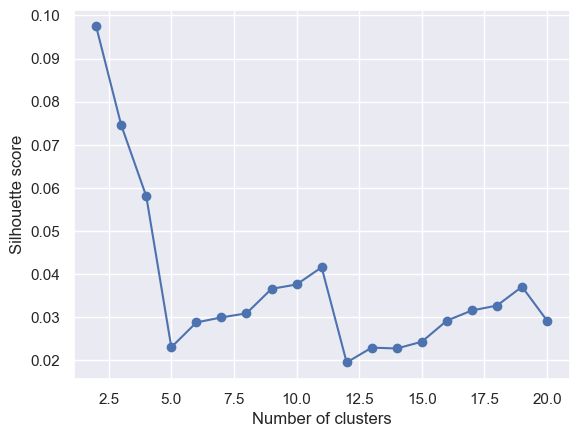

In [ ]:
optimal_sil_k, sil_scores = silhouette_method(data_numeric_standarized, K=(2, 21))

In [ ]:
print("optimal K using silhouette_score" ,optimal_sil_k)

optimal K using silhouette_score 2


In [ ]:
data_numeric_standarized.shape

(2692, 295)

In [ ]:
clusters

array([1, 4, 4, ..., 4, 4, 5], dtype=int32)

# Modeling

In [ ]:
agglomerative_model = AgglomerativeClustering(distance_threshold=None,
                                n_clusters=2,
                                linkage='ward',
                                affinity='euclidean')
predicted_clusters_hierarchicaly = agglomerative_model.fit_predict(data_numeric_standarized)

In [ ]:
np.unique(predicted_clusters_hierarchicaly)

array([0, 1], dtype=int64)

In [ ]:
agg_labels = agglomerative_model.labels_
agg_labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluating

* calinski_harabasz_score the more score the best clustering

In [ ]:
# Compute the Calinski-Harabasz 
# This method measures the ratio of the between-cluster variance to the within-cluster variance
ch_score = calinski_harabasz_score(data_numeric_standarized, predicted_clusters_hierarchicaly)

print('Calinski-Harabasz Index:', ch_score)

Calinski-Harabasz Index: 73.72105406708049


In [ ]:
# Agglomerative model with 12 clusters
n_clusters = 12
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = model.fit_predict(data_numeric_standarized)
# Compute the Calinski-Harabasz 
# This method measures the ratio of the between-cluster variance to the within-cluster variance
ch_score = calinski_harabasz_score(data_numeric_standarized, labels)

print('Calinski-Harabasz Index:', ch_score)

Calinski-Harabasz Index: 51.75155051464896


In [ ]:
# Agglomerative model with 6 clusters
n_clusters = 6
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = model.fit_predict(data_numeric_standarized)
# Compute the Calinski-Harabasz 
# This method measures the ratio of the between-cluster variance to the within-cluster variance
ch_score = calinski_harabasz_score(data_numeric_standarized, labels)

print('Calinski-Harabasz Index:', ch_score)

Calinski-Harabasz Index: 62.4201773008476


In [ ]:
# Reduce dimensionality of the data using PCA
pca = PCA(n_components=2)
X_agg_pca = pca.fit_transform(data_numeric_standarized)

# Cluster the reduced data using Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_agg_pca)

# Get the cluster labels
labels = agg.labels_

# Print the results
print("Cluster labels: ", labels)

Cluster labels:  [1 0 0 ... 0 0 1]


use PCA to reduce the dimentions of the data to plot it in 2d space


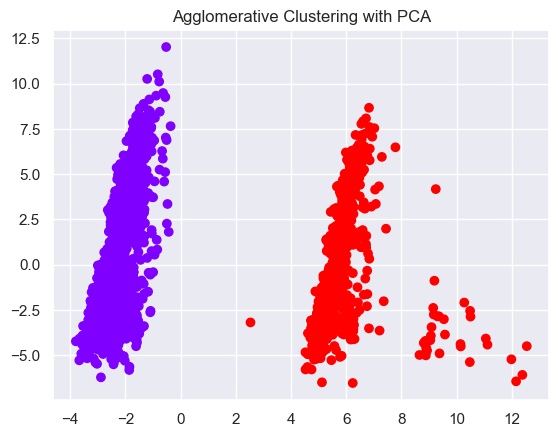

In [ ]:
# Plot the clustered data "agglomerative"
plt.scatter(X_agg_pca[:, 0], X_agg_pca[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering with PCA')
plt.show()

In [ ]:
data_numeric_standarized['predicted_clusters_hierarchicaly'] = predicted_clusters_hierarchicaly

In [ ]:
data_numeric_standarized['predicted_clusters_hierarchicaly']

0       1
1       0
2       0
3       0
4       0
       ..
2687    0
2688    1
2689    0
2690    0
2691    0
Name: predicted_clusters_hierarchicaly, Length: 2692, dtype: int64

# Agglomerative Analysis

## Label 1

* no older people 85 and older
* 25% 35-44
* 29% 45-54
* 81% own one vehicle 
* 98% employees 
* 5% students part time
* 0.6% use bus to work
* work_mode_In a household vehicle 95%
*  uses rail to work 0.6%
* street parking 36% 
* 1.5% other
* 56% work parking
* 73% free parking
* 12% pays 
* 16% asian
* 14% black
* 50% white

we can say that this cluster group all the employees who has private vehicle as main transportation method

## Label 0 

* 25-34yo 17% and 34-44yo 16% 45-54yo 15% 55-64yo 15%
* 41% are full time employeed
* 56% currently not employeed ((retired))
* neither volunteers
* 20% students
* most of them use vehicle 1 29%
* 32% uses rails (subway, train, etc..) 
* most of them don't work telework and if they do 6% less than a month
* work_park_location_Parking 97%
* 50% females
* 35% male
* 80% don't have disabilities

and this cluster group all other types of people such as employees without private car and students and who uses rails and buses